Import the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import mne
import scipy.stats as stats
import pyentrp.entropy as ent
import pywt

DATA LOADING

Load the eegs of the first 5 participants into eeg_data dictionary

In [ ]:
participant_ids = [f"s{i:02d}" for i in range(1, )]  # Assuming 5 participants
eeg_data = {}

# Load EEG data for each participant
for participant_id in participant_ids:
    file_path = f"eegs/{participant_id}.bdf"
    raw = mne.io.read_raw_bdf(file_path, preload=True)
    eeg_data[participant_id] = raw

# Print information about loaded data
for participant_id, raw in eeg_data.items():
    print(f"Participant ID: {participant_id}")
    # print(raw.info)

Keep only the eeg channels, reorder them to Geneva order and store them to eeg_data_reordered dict

In [ ]:
# Define the channel names and indices for Twente and Geneva
channel_names_geneva = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
participant_ids = [f"s{i:02d}" for i in range(1, 6)]  # Assuming 5 participants
eeg_data_reordered = {}

# Load EEG data for each participant and reorder channels
for participant_id in participant_ids:
    file_path = f"eegs/{participant_id}.bdf"
    raw = mne.io.read_raw_bdf(file_path, preload=True)
    
    # Keep only EEG channels
    raw_eeg = raw.pick_types(eeg=True)
    
    # Reorder EEG channels to Geneva order
    raw_reordered = raw_eeg.reorder_channels(channel_names_geneva)

    # Store reordered EEG data
    eeg_data_reordered[participant_id] = raw_reordered

# Print information about loaded and reordered data
for participant_id, raw_reordered in eeg_data_reordered.items():
    print(f"Participant ID: {participant_id}")
    print("Reordered EEG data shape:", raw_reordered._data.shape)


In [116]:
import mne

def load_eeg_data(participant_id, file_path_template="eegs/{participant_id}.bdf"):
    """
    Load EEG data for a given participant.
    
    Args:
    - participant_id (str): Participant ID.
    - file_path_template (str): Template for file path.
    
    Returns:
    - raw_eeg (mne.io.Raw): The raw EEG data.
    """
    file_path = file_path_template.format(participant_id=participant_id)
    raw = mne.io.read_raw_bdf(file_path, preload=True)
    
    # Keep only EEG channels
    raw_eeg = raw.pick_types(eeg=True)
    return raw_eeg


In [117]:
def reorder_eeg_channels(raw_eeg, channel_names_geneva):
    """
    Reorder EEG channels to Geneva order.
    
    Args:
    - raw_eeg (mne.io.Raw): The raw EEG data.
    - channel_names_geneva (list): List of channel names in Geneva order.
    
    Returns:
    - raw_reordered (mne.io.Raw): Reordered EEG data.
    """
    raw_reordered = raw_eeg.reorder_channels(channel_names_geneva)
    return raw_reordered


In [118]:
def process_participants(participant_ids, channel_names_geneva):
    """
    Process EEG data for all participants, load and reorder channels.
    
    Args:
    - participant_ids (list): List of participant IDs.
    - channel_names_geneva (list): List of channel names in Geneva order.
    
    Returns:
    - eeg_data_reordered (dict): Dictionary with participant ID as keys and reordered EEG data as values.
    """
    eeg_data_reordered = {}
    
    for participant_id in participant_ids:
        raw_eeg = load_eeg_data(participant_id)
        raw_reordered = reorder_eeg_channels(raw_eeg, channel_names_geneva)
        
        # Store reordered EEG data
        eeg_data_reordered[participant_id] = raw_reordered
    
    return eeg_data_reordered


In [ ]:
# Define parameters
channel_names_geneva = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
participant_ids = [f"s{i:02d}" for i in range(1, 3)]  # Assuming 5 participants

# Process the participants
eeg_data_reordered = process_participants(participant_ids, channel_names_geneva)

# Print information about loaded and reordered data
for participant_id, raw_reordered in eeg_data_reordered.items():
    print(f"Participant ID: {participant_id}")
    print("Reordered EEG data shape:", raw_reordered._data.shape)


In [122]:

# Define parameters
channel_names_geneva = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
participant_ids = [f"s{i:02d}" for i in range(1, 3)]  # Assuming 5 participants

# Load the raw EEG data for each participant
raw_data = {participant_id: load_eeg_data(participant_id) for participant_id in participant_ids}

# Process (reorder) the participants' data
eeg_data_reordered = process_participants(participant_ids, channel_names_geneva)

# Print information about the loaded and reordered data
process_participant_info(eeg_data_reordered, raw_data, show_plots=False)  # Toggle `show_plots` to True if you want to see plots


Extracting EDF parameters from c:\Users\Odysseas\git\Emotion_Recognition\Emotion_Recognition_eegs\eegs\s01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from c:\Users\Odysseas\git\Emotion_Recognition\Emotion_Recognition_eegs\eegs\s02.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1895935  =      0.000 ...  3702.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from c:\Users\Odysseas\git\Emotion_Recognition\Emotion_Recognition_eegs\eegs\s01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Extr

Check new channels and size

In [ ]:
import matplotlib.pyplot as plt

# Iterate through each participant
for participant_id, raw_reordered in eeg_data_reordered.items():
    print(f"Participant ID: {participant_id}")
    
    # Before reordering
    print("Channel names before reordering:", raw.info['ch_names'])
    
    # # Plot channel locations before reordering
    # fig_before = raw.plot_sensors(show_names=True, title="Channel Locations Before Reordering")
    # plt.show()
    
    # After reordering
    print("Channel names after reordering:", raw_reordered.info['ch_names'])
    
    # # Plot channel locations after reordering
    # fig_after = raw_reordered.plot_sensors(show_names=True, title="Channel Locations After Reordering")
    # plt.show()
    
    # Check data shape before and after reordering
    print("EEG data shape before reordering:", raw._data.shape)
    print("EEG data shape after reordering:", raw_reordered._data.shape)


In [119]:
def print_eeg_channel_info(participant_id, raw, raw_reordered):
    """
    Prints channel information before and after reordering for a participant.
    
    Args:
    - participant_id (str): The ID of the participant.
    - raw (mne.io.Raw): The original raw EEG data.
    - raw_reordered (mne.io.Raw): The reordered EEG data.
    """
    print(f"Participant ID: {participant_id}")
    
    # Print channel names before and after reordering
    print("Channel names before reordering:", raw.info['ch_names'])
    print("Channel names after reordering:", raw_reordered.info['ch_names'])
    
    # Print EEG data shape before and after reordering
    print("EEG data shape before reordering:", raw._data.shape)
    print("EEG data shape after reordering:", raw_reordered._data.shape)


In [120]:
import matplotlib.pyplot as plt

def plot_sensor_locations(raw, raw_reordered, show_plots=True):
    """
    Plots sensor locations before and after reordering.
    
    Args:
    - raw (mne.io.Raw): The original raw EEG data.
    - raw_reordered (mne.io.Raw): The reordered EEG data.
    - show_plots (bool): Whether to display the plots.
    """
    if show_plots:
        # Plot channel locations before reordering
        fig_before = raw.plot_sensors(show_names=True, title="Channel Locations Before Reordering")
        plt.show()
        
        # Plot channel locations after reordering
        fig_after = raw_reordered.plot_sensors(show_names=True, title="Channel Locations After Reordering")
        plt.show()


In [121]:
def process_participant_info(eeg_data_reordered, raw_data, show_plots=False):
    """
    Process and display information for each participant, including channel names, 
    data shapes, and sensor plots.
    
    Args:
    - eeg_data_reordered (dict): Dictionary with participant IDs as keys and reordered EEG data as values.
    - raw_data (dict): Dictionary with participant IDs as keys and original raw EEG data as values.
    - show_plots (bool): Whether to display sensor plots.
    """
    for participant_id, raw_reordered in eeg_data_reordered.items():
        raw = raw_data[participant_id]
        
        # Print EEG channel and data shape information
        print_eeg_channel_info(participant_id, raw, raw_reordered)
        
        # Optionally plot sensor locations
        if show_plots:
            plot_sensor_locations(raw, raw_reordered, show_plots)


Read and sort based on experiment_id the Participants_ratings csv

In [ ]:
df = pd.read_csv("participant_ratings.csv")
df_sorted = df.sort_values(by=['Participant_id', 'Experiment_id'])

df_sorted


In [123]:
import pandas as pd

def load_participant_ratings(file_path):
    """
    Load participant ratings from a CSV file.
    
    Args:
    - file_path (str): Path to the CSV file containing participant ratings.
    
    Returns:
    - DataFrame: A pandas DataFrame containing the participant ratings.
    """
    df = pd.read_csv(file_path)
    return df

def sort_ratings(df):
    """
    Sort the DataFrame by Participant ID and Experiment ID.
    
    Args:
    - df (DataFrame): The DataFrame containing participant ratings.
    
    Returns:
    - DataFrame: The sorted DataFrame.
    """
    df_sorted = df.sort_values(by=['Participant_id', 'Experiment_id'])
    return df_sorted


Devide each eeg signal of each one of the participants into 40 60sec trials that represent the 40 experiments that took place

In [31]:
# List to store trial data for each participant
participant_trials = {participant_id: [] for participant_id in participant_ids}

trial_info = df_sorted

# Iterate over each participant's data for the first 5 participants
for participant_id, participant_data in trial_info.groupby('Participant_id'):
    participant_id_str = f"s{participant_id:02d}"  # Convert participant_id to string format
    if participant_id_str not in participant_ids:
        continue

    # Get the raw EEG data for the current participant
    raw_data = eeg_data_reordered[participant_id_str]

    # Iterate over each trial for the current participant
    for index, trial in participant_data.iterrows():
        # Extract the start time of the trial (in seconds)
        start_time = trial['Start_time'] / 1e6  # Convert microseconds to seconds

        # Define the start and end time of the trial (assuming 1-minute duration)
        end_time = start_time + 60  # 1-minute duration

        # Extract the trial data based on the start and end time
        trial_data = raw_data.copy().crop(tmin=start_time, tmax=end_time)

        # Store the trial data in the list for the current participant
        participant_trials[participant_id_str].append(trial_data)

        # Print participant ID and trial information
        # print(participant_id_str, trial)


In [124]:
def extract_trial_data(participant_id_str, participant_data, raw_data):
    """
    Extracts trial data for a specific participant.
    
    Args:
    - participant_id_str (str): The ID of the participant.
    - participant_data (DataFrame): The DataFrame containing trial information for the participant.
    - raw_data (mne.io.Raw): The raw EEG data for the participant.
    
    Returns:
    - List: A list containing trial data for the participant.
    """
    trials = []
    
    # Iterate over each trial for the current participant
    for index, trial in participant_data.iterrows():
        # Extract the start time of the trial (in seconds)
        start_time = trial['Start_time'] / 1e6  # Convert microseconds to seconds
        
        # Define the start and end time of the trial (assuming 1-minute duration)
        end_time = start_time + 60  # 1-minute duration
        
        # Extract the trial data based on the start and end time
        trial_data = raw_data.copy().crop(tmin=start_time, tmax=end_time)
        
        # Store the trial data in the list for the current participant
        trials.append(trial_data)
        
        # Print participant ID and trial information (optional)
        # print(participant_id_str, trial)
    
    return trials

def process_participant_trials(participant_ids, trial_info, eeg_data_reordered):
    """
    Processes trial data for all participants.
    
    Args:
    - participant_ids (list): List of participant IDs.
    - trial_info (DataFrame): The sorted DataFrame containing trial information.
    - eeg_data_reordered (dict): Dictionary with participant IDs as keys and reordered EEG data as values.
    
    Returns:
    - dict: A dictionary containing trial data for each participant.
    """
    participant_trials = {participant_id: [] for participant_id in participant_ids}

    # Iterate over each participant's data
    for participant_id, participant_data in trial_info.groupby('Participant_id'):
        participant_id_str = f"s{participant_id:02d}"  # Convert participant_id to string format
        if participant_id_str not in participant_ids:
            continue
        
        # Get the raw EEG data for the current participant
        raw_data = eeg_data_reordered[participant_id_str]

        # Extract trial data for the current participant
        trials = extract_trial_data(participant_id_str, participant_data, raw_data)
        
        # Store trial data in the dictionary
        participant_trials[participant_id_str] = trials
    
    return participant_trials


In [126]:

# Load and sort participant ratings
ratings_file_path = "participant_ratings.csv"
df = load_participant_ratings(ratings_file_path)  # Load ratings data
df_sorted = sort_ratings(df)  # Sort the data

# Process trial data for all participants
participant_trials = process_participant_trials(participant_ids, df_sorted, eeg_data_reordered)

# Example: Print the number of trials for each participant
for participant_id, trials in participant_trials.items():
    print(f"Participant ID: {participant_id}, Number of Trials: {len(trials)}")

   


Participant ID: s01, Number of Trials: 40
Participant ID: s02, Number of Trials: 40


In [ ]:
participant_trials

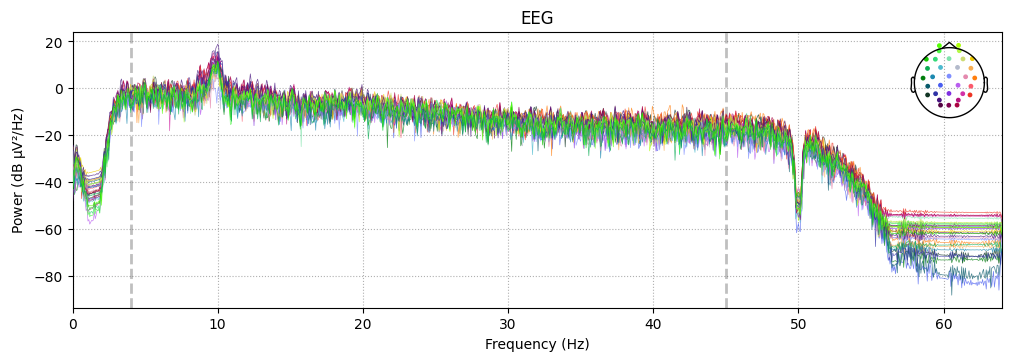

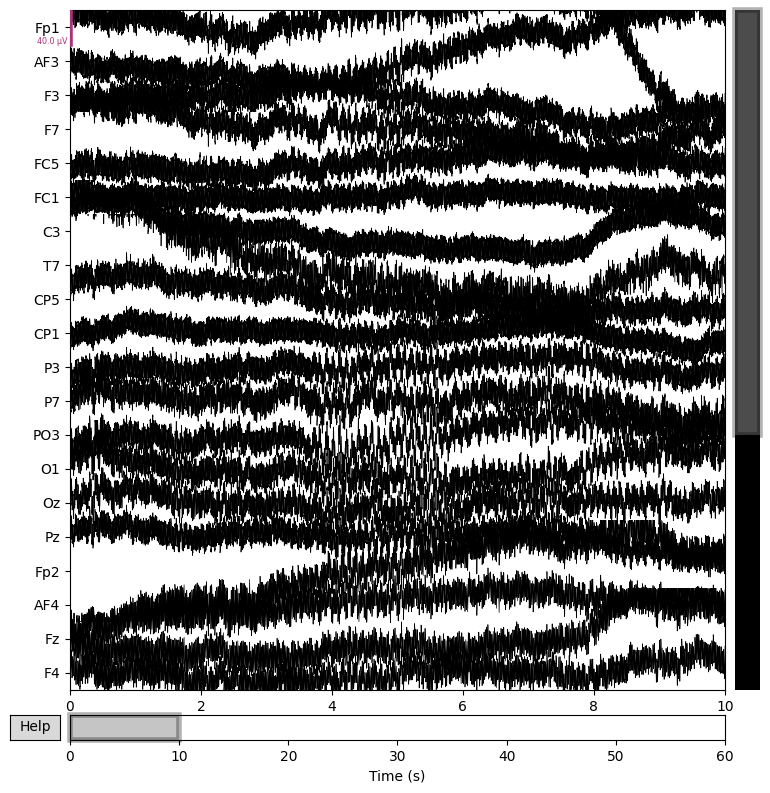

Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Odysseas\AppData\Local\Temp\ipykernel_36036\2036397447.py:9: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  first_trial_data.compute_psd().plot()
C:\Users\Odysseas\AppData\Local\Temp\ipykernel_36036\2036397447.py:9: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  first_trial_data.compute_psd().plot()
c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


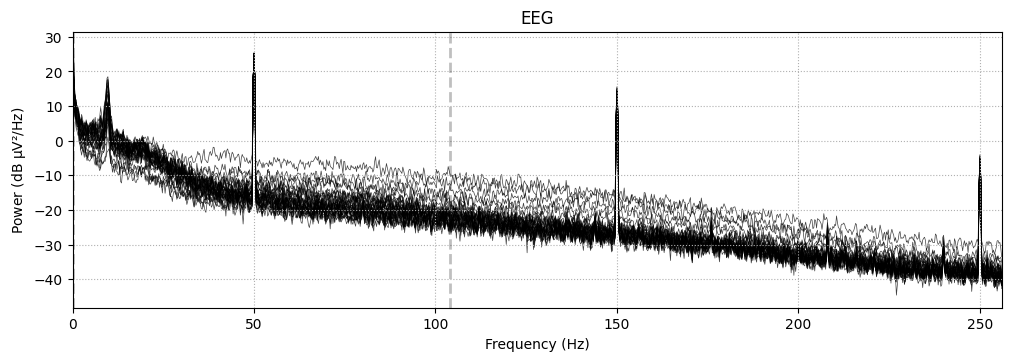

In [131]:
# Plot PSD for the first trial data of the first participant
first_participant_trials = participant_trials['s01']
first_trial_data = first_participant_trials[0]


# Plot the first trial data
first_trial_data.plot()
# Plot the power spectral density (PSD)
first_trial_data.compute_psd().plot()

Print the number of trials

In [ ]:
# Get the number of participants
num_participants = len(participant_trials)
print(f"Number of participants: {num_participants}")

# Get the number of trials for each participant
for participant_id, trials in participant_trials.items():
    num_trials = len(trials)
    print(f"Participant {participant_id}: Number of trials = {num_trials}")

Print the trials of the first participant

In [ ]:
# Accessing the trial information DataFrame for the first participant
first_participant_trial_info = trial_info[trial_info['Participant_id'] == 1]

# Print the information of each trial
for index, trial_data in first_participant_trial_info.iterrows():
    print(f"Trial {index + 1} info:")
    print(trial_data)


We load the trials of the first participant into first_participant_trials and plot the first one

In [ ]:

first_participant_trials = participant_trials['s01']
first_trial_data = first_participant_trials[0]
first_trial_data.plot()

Plot the psd of the first trial

In [ ]:
first_trial_data.plot_psd()

PREPROCESSING

In [ ]:
# Apply Common Average Reference (CAR)
car_participant_data = {}
for participant_id, trials in participant_trials.items():
    car_participant_data[participant_id] = apply_common_average_reference(trials)

# Apply band-pass filter
low_freq = 4  # Lower cutoff frequency in Hz
high_freq = 45  # Upper cutoff frequency in Hz
filtered_participant_data = {}
for participant_id, trials in car_participant_data.items():
    filtered_participant_data[participant_id] = apply_bandpass_filter(trials, low_freq, high_freq)

# Apply notch filter
notch_freqs = [50, 60]  # Notch filter frequencies in Hz
notch_filtered_participant_data = {}
for participant_id, trials in filtered_participant_data.items():
    notch_filtered_participant_data[participant_id] = apply_notch_filter(trials, notch_freqs)

# Resample the data
new_sampling_rate = 128  # Desired sampling rate
resampled_participant_data = {}
for participant_id, trials in notch_filtered_participant_data.items():
    resampled_participant_data[participant_id] = apply_resampling(trials, new_sampling_rate)

# Example: Plot the EEG data for the first trial of the first participant after resampling
first_participant_id = 's01'
first_resampled_trial = resampled_participant_data[first_participant_id][0]

# Plot the trial data after resampling
first_resampled_trial.plot(title="EEG Data for Participant s01 - Trial 1 (After Preprocessing and Resampling)")


In [54]:
def apply_common_average_reference(trials):
    """
    Apply Common Average Reference (CAR) to the given trials.

    Args:
    - trials (list): A list of mne.io.Raw objects representing the trials.

    Returns:
    - list: A list of mne.io.Raw objects with CAR applied.
    """
    trials_with_car = []
    
    for trial_data in trials:
        # Create a copy of the trial data
        trial_with_car = trial_data.copy()
        # Set the EEG reference to average and apply projection
        trial_with_car.set_eeg_reference('average', projection=False)
        trial_with_car.apply_proj()  # Apply the projection
        trials_with_car.append(trial_with_car)
        
        print(trial_data.info['projs'])

    for trial_data in trials_with_car:
        print("Mean of each channel after CAR:", trial_data.get_data().mean(axis=1))


    
    return trials_with_car


In [14]:
def apply_bandpass_filter(trials, low_freq, high_freq):
    """
    Apply band-pass filter to the given trials.

    Args:
    - trials (list): A list of mne.io.Raw objects representing the trials.
    - low_freq (float): Lower cutoff frequency in Hz.
    - high_freq (float): Upper cutoff frequency in Hz.

    Returns:
    - list: A list of mne.io.Raw objects with the band-pass filter applied.
    """
    filtered_trials = []
    
    for trial_data in trials:
        # Create a copy of the trial data
        filtered_trial = trial_data.copy()
        # Apply band-pass filter
        filtered_trial.filter(low_freq, high_freq)
        filtered_trials.append(filtered_trial)
    
    return filtered_trials


In [15]:
def apply_notch_filter(trials, notch_freqs):
    """
    Apply notch filters to the given trials.

    Args:
    - trials (list): A list of mne.io.Raw objects representing the trials.
    - notch_freqs (list): A list of frequencies to apply notch filters.

    Returns:
    - list: A list of mne.io.Raw objects with the notch filters applied.
    """
    notch_filtered_trials = []
    
    for trial_data in trials:
        # Create a copy of the trial data
        notch_filtered_trial = trial_data.copy()
        # Apply notch filter for each frequency in the list
        for freq in notch_freqs:
            notch_filtered_trial.notch_filter(freqs=freq, verbose=True)
        notch_filtered_trials.append(notch_filtered_trial)
    
    return notch_filtered_trials


In [16]:
def apply_resampling(trials, new_sampling_rate):
    """
    Resample the given trials to the new sampling rate.

    Args:
    - trials (list): A list of mne.io.Raw objects representing the trials.
    - new_sampling_rate (int): The desired sampling rate.

    Returns:
    - list: A list of mne.io.Raw objects resampled to the new sampling rate.
    """
    resampled_trials = []
    
    for trial_data in trials:
        # Resample trial data
        resampled_trial = trial_data.copy().resample(new_sampling_rate, npad="auto")
        resampled_trials.append(resampled_trial)
    
    return resampled_trials


Bandpass filter 4->45 Hz

In [ ]:
low_freq = 4  # Lower cutoff frequency in Hz
high_freq = 45  # Upper cutoff frequency in Hz

# Iterate through each trial
for i, trial_data in enumerate(first_participant_trials):
    # Apply band-pass filter
    trial_data.filter(low_freq, high_freq)
    
    # Plot the EEG data for the first trial after filtering
    if i == 0:
        trial_data.plot()


Notch filter to cut off 50Hz and 60 Hz

In [ ]:
notch_freqs = [50, 60]  # Notch filter frequencies in Hz

# Iterate through each trial
for i, trial_data in enumerate(first_participant_trials):
    # Apply notch filters
    for freq in notch_freqs:
        trial_data.notch_filter(freqs=freq, verbose=True)
    
    # Plot the EEG data for the first trial after applying the notch filters
    if i == 0:
        trial_data.plot()


Set new sampling rate to 128 Hz

In [ ]:
# Define the new sampling rate
new_sampling_rate = 128

# Resample each trial for the first participant
for i, trial_data in enumerate(first_participant_trials):
    first_participant_trials[i] = trial_data.resample(new_sampling_rate, npad="auto")

# Plot the EEG data for the first trial after resampling
first_participant_trials[0].plot()


Print info

In [ ]:
print(first_participant_trials[0].ch_names)
first_participant_trials[0].info

Plot psd of the preprocessed first trial

In [ ]:
first_participant_trials[0].plot_psd()

In [ ]:
len(first_participant_trials[0])

Using ICA to remove artifacts

In [56]:
from mne.preprocessing import ICA
from mne_icalabel import label_components

def perform_ica(trials, montage, variance_proportion=0.999):
    """
    Apply Independent Component Analysis (ICA) to clean EEG trials.

    Args:
    - trials (list): A list of mne.io.Raw objects representing the trials.
    - montage (mne.channels.DigMontage): The montage to set for the EEG data.
    - variance_proportion (float): Proportion of variance to explain (0.999 by default).

    Returns:
    - cleaned_trials (list): A list of cleaned mne.io.Raw objects.
    - ica_models (list): A list of ICA models fitted to each trial.
    """
    cleaned_trials = []
    ica_models = []

    for i, trial_data in enumerate(trials):
        # Set the montage
        trial_data.set_montage(montage)

        # Fit ICA with a proportion of variance
        ica = ICA(n_components=variance_proportion, method='infomax', fit_params=dict(extended=True), random_state=97, max_iter=1000)
        ica.fit(trial_data)
        

        # Store the fitted ICA model
        ica_models.append(ica)

        # Optionally: Label components using mne_icalabel
        labels = label_components(trial_data, ica, method='iclabel')

        # # Print labels for inspection
        # print(f'Trial {i + 1} component labels:')
        # print(labels)

        # Identify indices of components to exclude (not 'brain' or 'other')
        components_to_exclude = [j for j, label in enumerate(labels['labels']) if label not in ['brain']]
        ica.exclude = components_to_exclude

        # Apply ICA to the data, removing the unwanted components
        cleaned_data = ica.apply(trial_data, exclude=ica.exclude)

        # Store cleaned trial data
        cleaned_trials.append(cleaned_data)

        # # Optionally: Show new labels after cleaning
        # new_labels = label_components(cleaned_data, ica, method='iclabel')
        # print(f'Trial {i + 1} cleaned component labels:')
        # print(new_labels)

    return cleaned_trials, ica_models


In [ ]:
# Set the montage for the EEG data
montage = mne.channels.make_standard_montage('standard_1020')

# Apply ICA to clean the EEG data for each participant
cleaned_participant_data = {}
for participant_id, trials in resampled_participant_data.items():
    cleaned_trials, ica_models = perform_ica(trials, montage)
    cleaned_participant_data[participant_id] = cleaned_trials

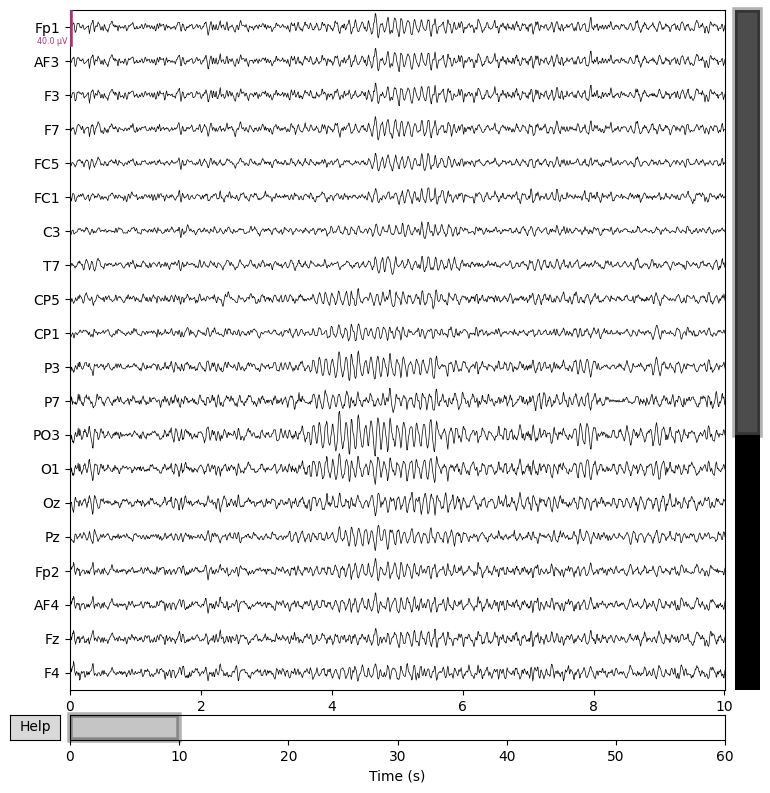

Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Odysseas\AppData\Local\Temp\ipykernel_36036\4210812328.py:7: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  first_cleaned_trial.compute_psd().plot()
c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


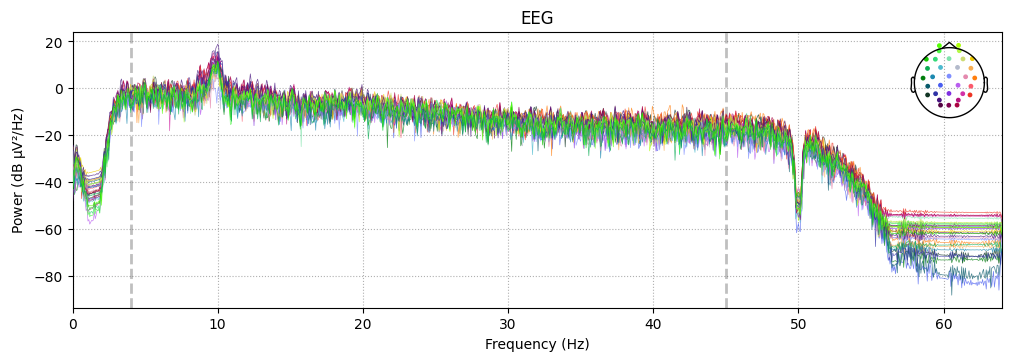

In [67]:
# Example: Plot the EEG data for the first trial of the first participant after resampling
first_participant_id = 's01'
first_cleaned_trial = cleaned_participant_data[first_participant_id][0]

# Plot the trial data after resampling
first_cleaned_trial.plot(title="EEG Data for Participant s01 - Trial 1 (After Preprocessing and Resampling)")
first_cleaned_trial.compute_psd().plot()

example

In [ ]:
# Epoch the data for each participant's trial
epoched_participant_data = {}
epoch_duration = 1.0  # 1 second epochs
discard_duration = 3.0  # discard first 3 seconds

for participant_id, trials in resampled_participant_data.items():
    epoched_trials = []
    for trial in trials:
        # Trial duration is 60 seconds, we'll discard first 3 seconds, so we have 57 seconds left
        events = mne.make_fixed_length_events(trial, start=discard_duration, duration=epoch_duration)
        
        # Check if events were created successfully
        if len(events) == 0:
            print(f"No events created for participant {participant_id}'s trial. Skipping.")
            continue
        
        # Create epochs using events, tmin=0 since we've already discarded the first 3 seconds
        epochs = mne.Epochs(trial, events, tmin=0.0, tmax=epoch_duration, baseline=None, preload=True, detrend=1)
        
        # Only append epochs if they contain data
        if epochs.get_data().size > 0:
            epoched_trials.append(epochs)
        else:
            print(f"No data after epoching for participant {participant_id}'s trial. Skipping.")

    epoched_participant_data[participant_id] = epoched_trials

# Example: Plot the first epoched trial of participant s01
if len(epoched_participant_data['s01']) > 0:
    epoched_trials_s01 = epoched_participant_data['s01'][0]
    epoched_trials_s01.plot()


In [30]:
import pandas as pd

# Example of existing trial DataFrame
# Assume df_sorted is your existing DataFrame with columns 'Participant_id', 'Experiment ID', 'Valence', and 'Arousal'

# Initialize a new DataFrame to store epoch values
epoch_data = []

# Specify the number of participants you want to keep
num_participants = 5

# Get unique participant IDs from the DataFrame and limit to the specified number
unique_participants = df_sorted['Participant_id'].unique()[:num_participants]

# Iterate through each row in the existing trial DataFrame
for _, row in df_sorted.iterrows():
    participant_id = row['Participant_id']
    
    # Check if the participant is in the limited list
    if participant_id not in unique_participants:
        continue  # Skip this participant if they are not in the selected range

    experiment_id = row['Experiment_id']  # Use Experiment ID as the trial identifier
    valence = row['Valence']
    arousal = row['Arousal']
    
    # For each trial, replicate the valence and arousal for all 57 epochs
    for epoch in range(1, 58):  # 57 epochs per trial
        epoch_data.append({
            'Participant_ID': participant_id,
            'Experiment_ID': experiment_id,  # Renamed to Experiment ID
            'Epoch_ID': epoch,
            'Valence': valence,
            'Arousal': arousal
        })

# Create a new DataFrame from the epoch data
epoch_df = pd.DataFrame(epoch_data)

# Display the new DataFrame
print(epoch_df.head())


In [ ]:
epoch_df

In [36]:
# Import the necessary plotting library from MNE
import matplotlib.pyplot as plt

# Access the participant data
participant_id = list(epoched_participant_data.keys())[2]  # The 3rd participant (index 2)

# Access the 30th trial of the 3rd participant
trial_30_epochs = epoched_participant_data[participant_id][29]  # The 30th trial (index 29)

# Plot the epochs of the 30th trial
print(f"Plotting 30th trial of Participant {participant_id}:")

# Use MNE's built-in plotting function
trial_30_epochs.plot()



In [ ]:
from braindecode.models import EEGNetv4
import torch
import pandas as pd

# Define the EEGNetv4 model
n_channels = len(channel_names_geneva)  # Number of EEG channels
# For regression, we might define output channels based on the target variable
n_outputs = 2  # Number of regression outputs, e.g., valence and arousal
input_window_samples = int(new_sampling_rate * epoch_duration)  # 1-second windows at 128 Hz

# Instantiate the EEGNetv4 model (ensure it is set up for regression)
model = EEGNetv4(in_chans=n_channels, n_classes=n_outputs, input_window_samples=input_window_samples)
model.eval()  # Set model to evaluation mode

# Move model to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Initialize a list to collect features for DataFrame
feature_data = []

# Extract features from the epoched data for each participant
for participant_id, epoched_trials in epoched_participant_data.items():
    for trial_epochs in epoched_trials:
        # Convert MNE epochs to numpy arrays and then torch tensors
        epochs_data = trial_epochs.get_data()  # shape (n_epochs, n_channels, n_times)
        epochs_data_tensor = torch.tensor(epochs_data, dtype=torch.float32).to(device)

        # Forward pass through the network to extract features
        with torch.no_grad():
            # Pass through the EEGNetv4 model to get regression outputs
            features = model(epochs_data_tensor)
        
        # Store features along with participant ID and epoch ID
        for epoch_id in range(features.size(0)):  # Assuming features are in shape (n_epochs, n_outputs)
            feature_data.append({
                'Participant_ID': participant_id,
                'Experiment_ID': experiment_id,  # Make sure to set the trial ID correctly
                'Epoch_ID': epoch_id + 1,  # Epoch IDs start from 1
                'Valence': features[epoch_id, 0].cpu().numpy(),  # Assuming first output is Valence
                'Arousal': features[epoch_id, 1].cpu().numpy()   # Assuming second output is Arousal
            })

# Create a new DataFrame from the collected feature data
feature_df = pd.DataFrame(feature_data)

# Display the new DataFrame
print(feature_df.head())


In [34]:
feature_df

In [ ]:
import pandas as pd
import numpy as np

# Initialize an empty DataFrame to store all participants' features
all_features_df = pd.DataFrame()

# Iterate through the features of each participant
for participant_id, participant_features in features_participant_data.items():
    # Convert the list of features into a NumPy array (shape: (n_trials, n_features))
    participant_features_array = np.concatenate(participant_features, axis=0)  # Concatenate trials
    
    # Create a DataFrame for the current participant
    participant_df = pd.DataFrame(participant_features_array)
    
    # Add a column for participant ID
    participant_df['Participant_ID'] = participant_id
    
    # Append to the main DataFrame
    all_features_df = pd.concat([all_features_df, participant_df], ignore_index=True)

# Save the features to a CSV file
output_file_path = "extracted_features.csv"
all_features_df.to_csv(output_file_path, index=False)

print(f"Features successfully saved to {output_file_path}")


new run code

In [58]:
def epoch_trials(resampled_data, epoch_duration=1.0, discard_duration=3.0):
    """
    Epoch the EEG data for each trial in the provided dictionary of resampled data.

    Args:
    - resampled_data (dict): A dictionary with participant IDs as keys and lists of mne.io.Raw objects as values.
    - epoch_duration (float): Duration of each epoch in seconds (default: 1.0).
    - discard_duration (float): Duration to discard from the start of each trial in seconds (default: 3.0).

    Returns:
    - dict: A dictionary with participant IDs as keys and lists of epoched trials as values.
    """
    epoched_data = {}

    # Loop through each participant's trials
    for participant_id, trials in resampled_data.items():
        epoched_trials = []
        
        # Process each trial for the current participant
        for trial_data in trials:
            # Generate events for fixed-length epochs after discarding initial seconds
            events = mne.make_fixed_length_events(trial_data, start=discard_duration, duration=epoch_duration)

            # Check if events were successfully created
            if len(events) == 0:
                print(f"No events created for participant {participant_id}'s trial. Skipping.")
                continue

            # Create epochs from the events
            epochs = mne.Epochs(trial_data, events, tmin=0.0, tmax=epoch_duration, baseline=None, preload=True, detrend=1)

            # Append epochs if they contain data
            if epochs.get_data().size > 0:
                epoched_trials.append(epochs)
            else:
                print(f"No data after epoching for participant {participant_id}'s trial. Skipping.")

        epoched_data[participant_id] = epoched_trials

    return epoched_data



def create_epoch_dataframe(df, num_participants=2, epochs_per_trial=56):
    """
    Create a DataFrame containing epoch information for each trial.
    
    Args:
    - df_sorted (pd.DataFrame): Sorted DataFrame containing columns 'Participant_id', 'Experiment_id', 'Valence', 'Arousal'.
    - num_participants (int): Number of participants to include in the output (default: 5).
    - epochs_per_trial (int): Number of epochs per trial (default: 57).
    
    Returns:
    - epoch_df (pd.DataFrame): A DataFrame containing 'Participant_ID', 'Experiment_ID', 'Epoch_ID', 'Valence', 'Arousal'.
    """
    epoch_data = []  # List to store epoch data

    # Get unique participant IDs and limit to the specified number
    unique_participants = df['Participant_id'].unique()[:num_participants]

    # Iterate through each row in the sorted DataFrame
    for _, row in df.iterrows():
        participant_id = row['Participant_id']

        # Check if the participant is in the limited list
        if participant_id not in unique_participants:
            continue  # Skip if the participant is not in the selected range

        experiment_id = row['Experiment_id']
        valence = row['Valence']
        arousal = row['Arousal']

        # For each trial, replicate the valence and arousal for all epochs
        for epoch in range(1, epochs_per_trial + 1):
            epoch_data.append({
                'Participant_ID': participant_id,
                'Experiment_ID': experiment_id,
                'Epoch_ID': epoch,
                'Valence': valence,
                'Arousal': arousal
            })

    # Create a new DataFrame from the epoch data
    epoch_df = pd.DataFrame(epoch_data)
    
    return epoch_df


In [ ]:
# Epoch the data for each participant's trials
epoched_participant_data = epoch_trials(resampled_participant_data, epoch_duration=1.0, discard_duration=3.0)



In [89]:
# Create epoch DataFrame for the first few participants
epoch_df = create_epoch_dataframe(df_sorted, num_participants=2, epochs_per_trial=56)

In [90]:
epoch_df

,Participant_ID,Experiment_ID,Epoch_ID,Valence,Arousal
0,1.0,1.0,1,7.71,7.60
1,1.0,1.0,2,7.71,7.60
2,1.0,1.0,3,7.71,7.60
3,1.0,1.0,4,7.71,7.60
4,1.0,1.0,5,7.71,7.60
...,...,...,...,...,...
4475,2.0,40.0,52,6.05,6.67
4476,2.0,40.0,53,6.05,6.67
4477,2.0,40.0,54,6.05,6.67
4478,2.0,40.0,55,6.05,6.67


end

In [ ]:
# Example: Plot the cleaned data for the first trial of the first participant
first_participant_id = 's01'
first_cleaned_trial = cleaned_participant_data[first_participant_id][0]

# Plot the cleaned trial data
first_cleaned_trial.plot(title="Cleaned EEG Data for Participant s01 - Trial 1")

In [83]:
import pandas as pd

# # Load participant ratings data
# ratings_file_path = "participant_ratings.csv"
# df_ratings = pd.read_csv(ratings_file_path)

# Create a list to store trials and their corresponding labels
trial_labels = []

# Iterate through each participant's trials to associate EEG data with valence and arousal
for participant_id, trials in cleaned_participant_data.items():
    participant_num = int(participant_id[1:])  # Extract participant number from ID (e.g., 's01' -> 1)
    
    # Get the trials for this participant
    participant_trials = df_sorted[df_sorted["Participant_id"] == participant_num]
    
    for trial_index, trial in enumerate(trials):
        # Get the corresponding valence and arousal scores
        valence = participant_trials.iloc[trial_index]["Valence"]
        arousal = participant_trials.iloc[trial_index]["Arousal"]
        
        # Append the EEG trial and labels
        trial_labels.append((trial, valence, arousal))

# Now, trial_labels contains tuples of (EEG Trial, Valence, Arousal)
# Example: Extracting trial data and labels for model training
X = []  # Features (EEG data)
y_valence = []  # Labels for valence
y_arousal = []  # Labels for arousal

for eeg_trial, valence, arousal in trial_labels:
    X.append(eeg_trial.get_data())  # or any feature extraction method you want to use
    y_valence.append(valence)
    y_arousal.append(arousal)

# Convert lists to NumPy arrays or a DataFrame if needed for model training
import numpy as np

X = np.array(X)  # Shape: (num_trials, num_channels, num_samples)
y_valence = np.array(y_valence)
y_arousal = np.array(y_arousal)

# Example: Now X, y_valence, and y_arousal can be used for training a model


In [95]:
def get_trial_label(participant_id, trial, trial_idx):
    participant_num = int(participant_id[1:])  # Extract participant number from ID (e.g., 's01' -> 1)
    
    # Get the corresponding labels using participant_num and trial_idx
    trial_labels = df_sorted.loc[df_sorted["Participant_id"] == participant_num].iloc[trial_idx]
    
    label_valence = trial_labels["Valence"]
    label_arousal = trial_labels["Arousal"]
    
    return label_valence, label_arousal


In [ ]:
from braindecode.models import EEGNetv4
from braindecode.preprocessing import create_fixed_length_windows
from braindecode.datasets import create_from_X_y
import numpy as np

# Define parameters
sampling_rate = 128  # Sampling frequency in Hz
trial_length_seconds = 60  # Length of each trial in seconds
num_trials_per_participant = 40  # Number of trials per participant
num_participants = len(participant_ids)  # Assuming you have defined `participant_ids`
window_size_seconds = 1  # Size of each window in seconds
start_offset_seconds = 3  # Start offset in seconds to skip the first 3 seconds

# Each trial will have this many samples
num_samples_per_trial = sampling_rate * trial_length_seconds  # 128 * 60 = 7680 samples

# 1. Prepare the data for EEGNetv4
all_trials = []
all_labels = []

for participant_id, trials in cleaned_participant_data.items():
    for trial_idx, trial in enumerate(trials):  # Add trial_idx to enumerate trials
        trial_data = trial.get_data()  # Shape: (n_channels, n_samples)
        all_trials.append(trial_data)

        # Get label for the trial with the correct trial index
        label_valence, label_arousal = get_trial_label(participant_id, trial, trial_idx)
        all_labels.append((label_valence, label_arousal))  # Store both labels

# 2. Create the dataset
sfreq = 128  # Sampling frequency (Hz)
drop_last_window = False  # Set to True to drop incomplete last windows

# Create dataset from X and y
dataset = create_from_X_y(X, y, drop_last_window=drop_last_window, sfreq=sfreq)

# Calculate samples for window size and offset
window_size_samples = sampling_rate * window_size_seconds  # 128 samples for 1 second
start_offset_samples = sampling_rate * start_offset_seconds  # 384 samples (skip first 3 seconds)

# Create fixed-length windows from the dataset
windows_dataset = create_fixed_length_windows(
    concat_ds=dataset,  # The dataset created from your data
    start_offset_samples=start_offset_samples,
    stop_offset_samples=None,  # Use the full length of the dataset
    window_size_samples=window_size_samples,  # 1-second window
    window_stride_samples=window_size_samples,  # No overlap
    drop_last_window=True,  # Drop incomplete windows
    targets_from='y'  # Use target labels for windows
)


# 4. Define the EEGNetv4 model
n_classes = 2  # Two classes for valence and arousal
model = EEGNetv4(n_chans=X.shape[1], n_classes=n_classes, n_times=window_size_samples)

# 5. Train the model or extract features
# Prepare classifier
classifier = EEGClassifier(module=model, 
                           criterion=CroppedLoss(),  # Define your loss function
                           optimizer="adam",  # Define optimizer
                           train_split=None)  # Define train/test split if required

# 6. For feature extraction (evaluation mode)
features = model.forward(windows_dataset.X)  # Extract features for windows

# Further processing of features
# Example: Save or analyze the extracted features



# Process features further as needed
# Example: Save or analyze the features


In [ ]:
import mne
from mne.preprocessing import ICA
from mne_icalabel import label_components

# Set the montage for the EEG data
montage = mne.channels.make_standard_montage('standard_1020')

# List to store cleaned trials and ICA models
cleaned_trials = []
ica_models = []

# Loop through each resampled trial and fit ICA
for i, trial_data in enumerate(first_participant_trials):
    
    # Set the montage
    trial_data.set_montage(montage)
   
    # Fit ICA with a proportion of variance (0.999)
    ica = ICA(n_components=0.999, random_state=97, max_iter=1000)
    ica.fit(trial_data)
    
    # Store the fitted ICA model
    ica_models.append(ica)
    
    # Optionally: Label components using mne_icalabel
    labels = label_components(trial_data, ica, method='iclabel')
    
    # Print labels for inspection
    print(f'Trial {i+1} component labels:')
    print(labels)
    
    # # Plot the components for this trial
    # ica.plot_components(title=f'Trial {i+1} ICA Components')

    # Identify indices of components to exclude (not 'brain' or 'other')
    components_to_exclude = [j for j, label in enumerate(labels['labels']) if label not in ['brain', 'other']]
    
    # Set the components to exclude in the ICA object
    ica.exclude = components_to_exclude

    # Apply ICA to the data, removing the unwanted components
    cleaned_data = ica.apply(trial_data, exclude=ica.exclude)

    # Store cleaned trial data
    cleaned_trials.append(cleaned_data)

    # Optionally: Show new labels after cleaning
    new_labels = label_components(cleaned_data, ica, method='iclabel')
    print(f'Trial {i+1} cleaned component labels:')
    print(new_labels)
    
   

# Now cleaned_trials contains the cleaned data for all trials


In [ ]:
from mne.preprocessing import ICA

# Set a fractional value for n_components
n_components_fraction = 32

# Initialize ICA with the extended Infomax method
ica = ICA(n_components=n_components_fraction, method='infomax')

# Fit the ICA model to your data
ica.fit(first_participant_trials[0])


In [ ]:
import matplotlib.pyplot as plt

# Plot each component separately
for i in range(len(ica.mixing_matrix_)):
    plt.figure()
    plt.plot(ica.mixing_matrix_[i])
    plt.title(f"Component {i+1}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()


Applying common average reference

In [ ]:
for i, trial_data in enumerate(first_participant_trials):
    first_participant_trials[i] = trial_data.copy().set_eeg_reference('average', projection=True)
    first_participant_trials[i].apply_proj()

# Plot the EEG data for the first trial after applying CAR
first_participant_trials[0].plot()


Deviding each trial into 60 1sec subtrials

In [35]:
import numpy as np

# Define the duration of each subtrial in seconds
subtrial_duration = 1  # 1 second

# Initialize a list to store the subtrials for all 40 trials of the first participant
first_participant_subtrials = []

# Iterate over each trial for the first participant
for trial_data in first_participant_trials:
    # Get the total duration of the trial in seconds
    trial_duration = trial_data.times[-1]

    # Calculate the number of subtrials
    num_subtrials = int(np.floor(trial_duration / subtrial_duration))

    # Initialize a list to store the subtrials for the current trial
    trial_subtrials = []

    # Iterate over each subtrial
    for i in range(num_subtrials):
        # Define the start and end time of the subtrial
        start_time = i * subtrial_duration
        end_time = (i + 1) * subtrial_duration

        # Extract the subtrial data
        subtrial_data = trial_data.copy().crop(tmin=start_time, tmax=end_time)

        # Append the subtrial data to the list
        trial_subtrials.append(subtrial_data)

    # Append the list of subtrials for the current trial to the list for all trials
    first_participant_subtrials.append(trial_subtrials)

# Now you have a nested list where first_participant_subtrials[i][j] represents the j-th subtrial of the i-th trial


In [ ]:
len(trial_subtrials)

Cut the first 3 seconds

In [36]:
# Drop the first three subtrials from each trial's list of subtrials for all 40 trials of the first participant
for trial_subtrials in first_participant_subtrials:
    trial_subtrials = trial_subtrials[2:]


In [ ]:
len(trial_subtrials)

FEATURE EXTRACTION

In [23]:
import numpy as np
from scipy.fft import fft
from scipy.stats import entropy


In [62]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
from numpy.fft import fft
import mne  # Make sure to import mne for EEG data handling

# Function to compute differential entropy
def compute_differential_entropy(signal, sampling_rate, frequency_band):
    """
    Compute the differential entropy of the given signal in the specified frequency band.

    Args:
    - signal (ndarray): The EEG signal to analyze.
    - sampling_rate (float): The sampling rate of the signal.
    - frequency_band (tuple): The frequency band as (low, high).

    Returns:
    - float: The computed differential entropy.
    """
    # Perform FFT
    fft_result = fft(signal)
    freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)

    # Select the frequencies within the specified band
    band_indices = np.where((freqs >= frequency_band[0]) & (freqs <= frequency_band[1]))[0]
    band_fft = fft_result[band_indices]

    # Calculate Power Spectral Density (PSD)
    band_psd = np.abs(band_fft)**2 / len(signal)
    
    # Compute Probability Density Function (PDF)
    band_pdf = band_psd / np.sum(band_psd + 1e-10)  # Add a small epsilon to avoid division by zero

    
    # Compute differential entropy
    diff_entropy = entropy(band_pdf)
    return diff_entropy

def update_epoch_df_with_entropy(epoched_data, epoch_df, sampling_rate):
    """
    Update the epoch DataFrame with differential entropy features for each epoch in each trial.

    Args:
    - epoched_data (dict): Dictionary with participant IDs as keys and lists of trials as values.
    - epoch_df (pd.DataFrame): The existing DataFrame containing epoch information.
    - sampling_rate (int): The sampling rate of the EEG data.

    Returns:
    - pd.DataFrame: The updated DataFrame with new columns for differential entropy features.
    """
    # Ensure correct types for Participant_ID, Experiment_ID, and Epoch_ID
    epoch_df['Participant_ID'] = epoch_df['Participant_ID'].astype(int)
    epoch_df['Experiment_ID'] = epoch_df['Experiment_ID'].astype(int)
    epoch_df['Epoch_ID'] = epoch_df['Epoch_ID'].astype(int)

    # Define frequency bands
    frequency_bands = {
        'Theta': (4, 8),
        'Alpha': (8, 14),
        'Beta': (14, 31),
        'Gamma': (31, 45)
    }

    # Initialize new columns in the epoch_df for each frequency band
    for band_name in frequency_bands.keys():
        col_name = f'Differential_Entropy_{band_name}'
        if col_name not in epoch_df.columns:
            epoch_df[col_name] = np.nan  # Add new columns for each frequency band

    # Loop through each participant's trials in epoched data
    for participant_id, trials in epoched_data.items():
        for trial_index, trial in enumerate(trials):
            # Extract data for the current trial (shape: [n_channels, n_times, n_epochs])
            trial_data = trial.get_data()  # Get the EEG data for the trial
            num_epochs = min(trial_data.shape[2], 56)  # Limit to a maximum of 56 epochs

            # Loop through each epoch in the trial, up to the max of 56 epochs
            for epoch_index in range(num_epochs):
                # Extract the signal for the current epoch (shape: [n_channels, n_times])
                epoch_signal = trial_data[:, :, epoch_index]

                # Average the signal across channels
                channel_averages = np.mean(epoch_signal, axis=0)  # Shape: (n_times,)

                # Calculate differential entropy for each frequency band
                for band_name, frequency_band in frequency_bands.items():
                    try:
                        diff_entropy = compute_differential_entropy(channel_averages, sampling_rate, frequency_band)
                    except ZeroDivisionError as e:
                        print(f"ZeroDivisionError for Participant: {participant_id}, Trial: {trial_index + 1}, Epoch: {epoch_index + 1}. Error: {e}")
                        continue  # Skip to the next band

                    # Select the specific row for the corresponding participant, trial, and epoch
                    row_filter = (epoch_df['Participant_ID'] == int(participant_id.strip('s'))) & \
                                 (epoch_df['Experiment_ID'] == trial_index + 1) & \
                                 (epoch_df['Epoch_ID'] == epoch_index + 1)

                    # Update the corresponding row and column in the DataFrame
                    if row_filter.sum() == 1:
                        epoch_df.loc[row_filter, f'Differential_Entropy_{band_name}'] = diff_entropy
                    else:
                        print(f"Warning: More than one row or no rows found for Participant_ID {participant_id}, Trial_ID {trial_index + 1}, Epoch_ID {epoch_index + 1}")

    return epoch_df










In [103]:
# Create epoch DataFrame for the first few participants
epoch_df = create_epoch_dataframe(df_sorted, num_participants=2, epochs_per_trial=56)

In [ ]:
s=0
for participant_id, epochs in epoched_participant_data.items():
        for epoch_index, epoch in enumerate(epochs):
            s+=1
print(s)

In [ ]:
# Get the number of epochs for each participant and the events in each epoch
for participant_id, trials in epoched_participant_data.items():
    print(f"Participant {participant_id} has {len(trials)} trials.")
    
    for trials_index, trials in enumerate(trials):
        
        print(f"  trial {trials_index + 1} has {len(trials.events)} epochs")


In [112]:
epoch_df 


,Participant_ID,Experiment_ID,Epoch_ID,Valence,Arousal,Differential_Entropy_Theta_Ch1,Differential_Entropy_Theta_Ch2,Differential_Entropy_Theta_Ch3,Differential_Entropy_Theta_Ch4,Differential_Entropy_Theta_Ch5,...,Differential_Entropy_Gamma_Ch23,Differential_Entropy_Gamma_Ch24,Differential_Entropy_Gamma_Ch25,Differential_Entropy_Gamma_Ch26,Differential_Entropy_Gamma_Ch27,Differential_Entropy_Gamma_Ch28,Differential_Entropy_Gamma_Ch29,Differential_Entropy_Gamma_Ch30,Differential_Entropy_Gamma_Ch31,Differential_Entropy_Gamma_Ch32
0,1,1,1,7.71,7.60,NaN,0.531225,0.679136,0.253968,0.379476,...,0.790524,1.253260,0.782194,1.104659,1.112313,1.272388,1.086898,1.315660,1.276327,1.058329
1,1,1,2,7.71,7.60,NaN,0.675231,0.424194,0.307667,0.434105,...,1.310865,1.354653,1.292701,1.270492,1.012112,1.062689,1.076698,1.259561,1.358925,1.177591
2,1,1,3,7.71,7.60,NaN,0.563721,0.131355,0.203254,0.377221,...,1.283466,1.352864,1.135012,1.251644,0.800662,1.385358,1.136203,1.179017,1.122681,1.237554
3,1,1,4,7.71,7.60,NaN,0.434082,0.317788,0.622563,0.477169,...,1.331354,1.221818,0.809230,0.649589,1.246310,1.286250,1.280176,1.058078,1.366053,1.170989
4,1,1,5,7.71,7.60,NaN,0.213480,0.544114,0.348722,0.342188,...,1.158249,1.061919,0.993009,1.295957,1.119112,1.279308,1.338188,0.898687,1.240263,1.186887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,2,40,52,6.05,6.67,NaN,0.506809,0.672030,0.380550,0.354547,...,0.909842,1.264141,1.321595,1.382056,1.131530,1.266515,1.155133,1.288016,1.309473,1.377049
4476,2,40,53,6.05,6.67,NaN,0.692095,0.385551,0.143348,0.179393,...,1.210421,1.017534,1.312575,1.346957,1.316063,1.289109,1.088764,1.293719,1.329452,1.145955
4477,2,40,54,6.05,6.67,NaN,0.685686,0.692915,0.592295,0.020867,...,1.297728,1.179862,1.300149,1.261595,1.370844,1.144248,1.017588,1.230779,1.140519,1.107921
4478,2,40,55,6.05,6.67,NaN,0.645315,0.590352,0.690765,0.287239,...,1.176060,0.884173,0.588725,1.289058,1.254127,1.263000,1.179324,1.335640,0.777262,1.227180


In [ ]:
# # Convert the Participant_ID column to match the format used in epoched_data
# epoch_df['Participant_ID'] = epoch_df['Participant_ID'].apply(lambda x: f's{int(x):02d}')

# Define the necessary variables
sampling_rate = 128  # Hz, as per your example

# Update the DataFrame with differential entropy features
updated_epoch_df = update_epoch_df_with_entropy(epoched_participant_data, epoch_df, sampling_rate)

# Now, `updated_epoch_df` contains the new differential entropy columns
print(updated_epoch_df.head())


In [68]:
updated_epoch_df

,Participant_ID,Experiment_ID,Epoch_ID,Valence,Arousal,Differential_Entropy_Theta,Differential_Entropy_Alpha,Differential_Entropy_Beta,Differential_Entropy_Gamma
0,1,1,1,7.71,7.60,0.387210,0.601951,1.121105,1.193036
1,1,1,2,7.71,7.60,0.693082,0.354515,0.621890,1.140584
2,1,1,3,7.71,7.60,0.279967,0.124000,0.792893,1.212082
3,1,1,4,7.71,7.60,0.086627,0.052273,0.869421,1.286482
4,1,1,5,7.71,7.60,0.128919,0.012861,0.848118,1.079572
...,...,...,...,...,...,...,...,...,...
4475,2,40,52,6.05,6.67,0.269524,0.091571,0.932845,1.158985
4476,2,40,53,6.05,6.67,0.671233,0.193262,1.022621,1.253975
4477,2,40,54,6.05,6.67,0.664829,0.517878,1.206132,1.200082
4478,2,40,55,6.05,6.67,0.693040,0.416542,1.030222,1.309087


In [31]:
import numpy as np
import pandas as pd
from scipy.signal import hilbert
import mne  # Make sure to import mne for EEG data handling

# Function to compute PLV
def compute_plv(signal1, signal2):
    """
    Compute Phase Locking Value (PLV) between two signals.
    Args:
    - signal1, signal2: Two signals for which PLV will be computed.
    
    Returns:
    - float: The PLV value between the two signals.
    """
    phase_diff = np.angle(hilbert(signal1)) - np.angle(hilbert(signal2))
    plv = np.abs(np.sum(np.exp(1j * phase_diff)) / len(phase_diff))
    return plv

# Function to compute PLI
def compute_pli(signal1, signal2):
    """
    Compute Phase Lag Index (PLI) between two signals.
    Args:
    - signal1, signal2: Two signals for which PLI will be computed.
    
    Returns:
    - float: The PLI value between the two signals.
    """
    phase_diff = np.angle(hilbert(signal1)) - np.angle(hilbert(signal2))
    pli = np.abs(np.mean(np.sign(phase_diff)))
    return pli

def update_epoch_df_with_connectivity(epoched_data, epoch_df, sampling_rate):
    """
    Update the epoch DataFrame with connectivity features (PLV, PLI) for each epoch in each trial.
    
    Args:
    - epoched_data (dict): Dictionary with participant IDs as keys and lists of trials as values.
    - epoch_df (pd.DataFrame): The existing DataFrame containing epoch information.
    - sampling_rate (int): The sampling rate of the EEG data.
    
    Returns:
    - pd.DataFrame: The updated DataFrame with new columns for PLV and PLI features.
    """
    # Ensure correct types for Participant_ID, Experiment_ID, and Epoch_ID
    epoch_df['Participant_ID'] = epoch_df['Participant_ID'].astype(int)
    epoch_df['Experiment_ID'] = epoch_df['Experiment_ID'].astype(int)
    epoch_df['Epoch_ID'] = epoch_df['Epoch_ID'].astype(int)

    # Initialize new columns in the epoch_df for PLV and PLI
    if 'PLV_Avg' not in epoch_df.columns:
        epoch_df['PLV_Avg'] = np.nan  # Add new column for average PLV
    if 'PLI_Avg' not in epoch_df.columns:
        epoch_df['PLI_Avg'] = np.nan  # Add new column for average PLI

    # Loop through each participant's trials in epoched data
    for participant_id, trials in epoched_data.items():
        for trial_index, trial in enumerate(trials):
            # Extract data for the current trial (shape: [n_channels, n_times, n_epochs])
            trial_data = trial.get_data()  # Get the EEG data for the trial
            num_epochs = min(trial_data.shape[2], 56)  # Limit to a maximum of 56 epochs

            # Loop through each epoch in the trial, up to the max of 56 epochs
            for epoch_index in range(num_epochs):
                # Extract the signal for the current epoch (shape: [n_channels, n_times])
                epoch_signal = trial_data[:, :, epoch_index]

                # Compute PLV and PLI for each pair of channels and average them
                plv_values = []
                pli_values = []
                n_channels = epoch_signal.shape[0]

                for ch1 in range(n_channels):
                    for ch2 in range(ch1 + 1, n_channels):
                        signal1 = epoch_signal[ch1, :]
                        signal2 = epoch_signal[ch2, :]

                        plv = compute_plv(signal1, signal2)
                        pli = compute_pli(signal1, signal2)

                        plv_values.append(plv)
                        pli_values.append(pli)

                # Compute the average PLV and PLI for this epoch
                avg_plv = np.mean(plv_values)
                avg_pli = np.mean(pli_values)

                # Select the specific row for the corresponding participant, trial, and epoch
                row_filter = (epoch_df['Participant_ID'] == int(participant_id.strip('s'))) & \
                             (epoch_df['Experiment_ID'] == trial_index + 1) & \
                             (epoch_df['Epoch_ID'] == epoch_index + 1)

                # Update the corresponding row and column in the DataFrame
                if row_filter.sum() == 1:
                    epoch_df.loc[row_filter, 'PLV_Avg'] = avg_plv
                    epoch_df.loc[row_filter, 'PLI_Avg'] = avg_pli
                else:
                    print(f"Warning: More than one row or no rows found for Participant_ID {participant_id}, Trial_ID {trial_index + 1}, Epoch_ID {epoch_index + 1}")

    return epoch_df


In [ ]:
for participant_id, trials in epoched_participant_data.items():
    for trial_index, trial in enumerate(trials):
        trial_data = trial.get_data()
        print(trial_data.shape)

In [ ]:
# Define the necessary variables
sampling_rate = 128  # Hz, as per your example

# Update the DataFrame with differential entropy features
updated_epoch_df = update_epoch_df_with_connectivity(epoched_participant_data,updated_epoch_df, sampling_rate)

# Now, `updated_epoch_df` contains the new differential entropy columns
print(updated_epoch_df.head())

In [ ]:
updated_epoch_df

In [69]:
import numpy as np
import pandas as pd
import mne  # For EEG data handling

# Hjorth Activity (Variance)
def hjorth_activity(signal):
    """
    Compute Hjorth Activity, which is the variance of the signal.

    Args:
    - signal (ndarray): EEG signal data.

    Returns:
    - float: Hjorth Activity (variance of the signal).
    """
    return np.var(signal)

# Hjorth Mobility (Ratio of the variance of the derivative to the variance of the signal)
def hjorth_mobility(signal):
    """
    Compute Hjorth Mobility, which is the square root of the variance of the derivative
    of the signal divided by the variance of the signal.

    Args:
    - signal (ndarray): EEG signal data.

    Returns:
    - float: Hjorth Mobility.
    """
    variance_signal = np.var(signal)
    variance_derivative = np.var(np.diff(signal))
    return np.sqrt(variance_derivative / variance_signal)

# Hjorth Complexity (Mobility of the derivative divided by the mobility of the signal)
def hjorth_complexity(signal):
    """
    Compute Hjorth Complexity, which is the mobility of the derivative of the signal
    divided by the mobility of the signal.

    Args:
    - signal (ndarray): EEG signal data.

    Returns:
    - float: Hjorth Complexity.
    """
    derivative_signal = np.diff(signal)
    mobility_signal = hjorth_mobility(signal)
    mobility_derivative = hjorth_mobility(derivative_signal)
    return mobility_derivative / mobility_signal

def update_epoch_df_with_hjorth(epoched_data, epoch_df, sampling_rate):
    """
    Update the epoch DataFrame with Hjorth parameters (Activity, Mobility, Complexity) for each epoch in each trial.

    Args:
    - epoched_data (dict): Dictionary with participant IDs as keys and lists of trials as values.
    - epoch_df (pd.DataFrame): The existing DataFrame containing epoch information.
    - sampling_rate (int): The sampling rate of the EEG data.

    Returns:
    - pd.DataFrame: The updated DataFrame with new columns for Hjorth parameters.
    """
    # Ensure correct types for Participant_ID, Experiment_ID, and Epoch_ID
    epoch_df['Participant_ID'] = epoch_df['Participant_ID'].astype(int)
    epoch_df['Experiment_ID'] = epoch_df['Experiment_ID'].astype(int)
    epoch_df['Epoch_ID'] = epoch_df['Epoch_ID'].astype(int)

    # Initialize new columns in the epoch_df for Hjorth parameters
    if 'Hjorth_Activity' not in epoch_df.columns:
        epoch_df['Hjorth_Activity'] = np.nan
    if 'Hjorth_Mobility' not in epoch_df.columns:
        epoch_df['Hjorth_Mobility'] = np.nan
    if 'Hjorth_Complexity' not in epoch_df.columns:
        epoch_df['Hjorth_Complexity'] = np.nan

    # Loop through each participant's trials in epoched data
    for participant_id, trials in epoched_data.items():
        for trial_index, trial in enumerate(trials):
            # Extract data for the current trial (shape: [n_channels, n_times, n_epochs])
            trial_data = trial.get_data()  # Get the EEG data for the trial
            num_epochs = min(trial_data.shape[2], 56)  # Limit to a maximum of 56 epochs

            # Loop through each epoch in the trial, up to the max of 56 epochs
            for epoch_index in range(num_epochs):
                # Extract the signal for the current epoch (shape: [n_channels, n_times])
                epoch_signal = trial_data[:, :, epoch_index]

                # Average the signal across channels
                channel_averages = np.mean(epoch_signal, axis=0)  # Shape: (n_times,)

                # Calculate Hjorth parameters
                activity = hjorth_activity(channel_averages)
                mobility = hjorth_mobility(channel_averages)
                complexity = hjorth_complexity(channel_averages)

                # Select the specific row for the corresponding participant, trial, and epoch
                row_filter = (epoch_df['Participant_ID'] == int(participant_id.strip('s'))) & \
                             (epoch_df['Experiment_ID'] == trial_index + 1) & \
                             (epoch_df['Epoch_ID'] == epoch_index + 1)

                # Update the corresponding row and column in the DataFrame
                if row_filter.sum() == 1:
                    epoch_df.loc[row_filter, 'Hjorth_Activity'] = activity
                    epoch_df.loc[row_filter, 'Hjorth_Mobility'] = mobility
                    epoch_df.loc[row_filter, 'Hjorth_Complexity'] = complexity
                else:
                    print(f"Warning: More than one row or no rows found for Participant_ID {participant_id}, Trial_ID {trial_index + 1}, Epoch_ID {epoch_index + 1}")

    return epoch_df


In [ ]:
# Example sampling rate of the EEG data (replace with the correct value)
sampling_rate = 128  # Replace with your EEG sampling rate in Hz

# Call the function to update the DataFrame with Hjorth parameters
updated_epoch_df = update_epoch_df_with_hjorth(epoched_participant_data, updated_epoch_df, sampling_rate)

# Save or inspect the updated DataFrame
print(updated_epoch_df.head())  # Inspect the first few rows to ensure the Hjorth columns are updated


In [72]:
import numpy as np
import pandas as pd
import mne  # For EEG data handling

# Zero Crossing Rate (ZCR) Function
def zero_crossing_rate(signal):
    """
    Compute the Zero Crossing Rate (ZCR) of the given signal.

    Args:
    - signal (ndarray): The EEG signal data (1D array).

    Returns:
    - float: The zero crossing rate.
    """
    zero_crossings = np.sum(np.diff(np.signbit(signal)))  # Count the number of zero crossings
    return zero_crossings / len(signal)  # Normalize by the length of the signal

def update_epoch_df_with_zcr(epoched_data, epoch_df, sampling_rate):
    """
    Update the epoch DataFrame with Zero Crossing Rate (ZCR) for each epoch in each trial.

    Args:
    - epoched_data (dict): Dictionary with participant IDs as keys and lists of trials as values.
    - epoch_df (pd.DataFrame): The existing DataFrame containing epoch information.
    - sampling_rate (int): The sampling rate of the EEG data.

    Returns:
    - pd.DataFrame: The updated DataFrame with a new column for ZCR.
    """
    # Ensure correct types for Participant_ID, Experiment_ID, and Epoch_ID
    epoch_df['Participant_ID'] = epoch_df['Participant_ID'].astype(int)
    epoch_df['Experiment_ID'] = epoch_df['Experiment_ID'].astype(int)
    epoch_df['Epoch_ID'] = epoch_df['Epoch_ID'].astype(int)

    # Initialize new column in the epoch_df for Zero Crossing Rate (ZCR)
    if 'Zero_Crossing_Rate' not in epoch_df.columns:
        epoch_df['Zero_Crossing_Rate'] = np.nan  # Add new column for ZCR

    # Loop through each participant's trials in epoched data
    for participant_id, trials in epoched_data.items():
        for trial_index, trial in enumerate(trials):
            # Extract data for the current trial (shape: [n_channels, n_times, n_epochs])
            trial_data = trial.get_data()  # Get the EEG data for the trial
            num_epochs = min(trial_data.shape[2], 56)  # Limit to a maximum of 56 epochs

            # Loop through each epoch in the trial, up to the max of 56 epochs
            for epoch_index in range(num_epochs):
                # Extract the signal for the current epoch (shape: [n_channels, n_times])
                epoch_signal = trial_data[:, :, epoch_index]

                # Average the signal across channels
                channel_averages = np.mean(epoch_signal, axis=0)  # Shape: (n_times,)

                # Calculate the Zero Crossing Rate for the current epoch
                zcr = zero_crossing_rate(channel_averages)

                # Select the specific row for the corresponding participant, trial, and epoch
                row_filter = (epoch_df['Participant_ID'] == int(participant_id.strip('s'))) & \
                             (epoch_df['Experiment_ID'] == trial_index + 1) & \
                             (epoch_df['Epoch_ID'] == epoch_index + 1)

                # Update the corresponding row and column in the DataFrame
                if row_filter.sum() == 1:
                    epoch_df.loc[row_filter, 'Zero_Crossing_Rate'] = zcr
                else:
                    print(f"Warning: More than one row or no rows found for Participant_ID {participant_id}, Trial_ID {trial_index + 1}, Epoch_ID {epoch_index + 1}")

    return epoch_df


In [ ]:
# Example sampling rate of the EEG data (replace with the correct value)
sampling_rate = 128  # Replace with your EEG sampling rate in Hz

# Call the function to update the DataFrame with Hjorth parameters
updated_epoch_df = update_epoch_df_with_zcr(epoched_participant_data, updated_epoch_df, sampling_rate)

# Save or inspect the updated DataFrame
print(updated_epoch_df.head())  # Inspect the first few rows to ensure the Hjorth columns are updated


In [107]:
def update_epoch_df_with_entropy_per_channel(epoched_data, epoch_df, sampling_rate):
    """
    Update the epoch DataFrame with differential entropy features for each channel in each frequency band.

    Args:
    - epoched_data (dict): Dictionary with participant IDs as keys and lists of trials as values.
    - epoch_df (pd.DataFrame): The existing DataFrame containing epoch information.
    - sampling_rate (int): The sampling rate of the EEG data.

    Returns:
    - pd.DataFrame: The updated DataFrame with new columns for differential entropy features for each channel.
    """
    # Ensure correct types for Participant_ID, Experiment_ID, and Epoch_ID
    epoch_df['Participant_ID'] = epoch_df['Participant_ID'].astype(int)
    epoch_df['Experiment_ID'] = epoch_df['Experiment_ID'].astype(int)
    epoch_df['Epoch_ID'] = epoch_df['Epoch_ID'].astype(int)

    # Define frequency bands
    frequency_bands = {
        'Theta': (4, 8),
        'Alpha': (8, 14),
        'Beta': (14, 31),
        'Gamma': (31, 45)
    }

    # Create 128 unique columns (4 bands × 32 channels) only once
    expected_columns = []
    for band_name in frequency_bands.keys():
        for channel_index in range(1, 33):  # Assuming 32 channels, numbered 1 through 32
            col_name = f'Differential_Entropy_{band_name}_Ch{channel_index}'
            expected_columns.append(col_name)
            if col_name not in epoch_df.columns:
                epoch_df[col_name] = np.nan  # Add new columns for each frequency band and channel

    # Confirm that exactly 128 columns have been created for differential entropy
    actual_added_columns = [col for col in epoch_df.columns if col.startswith("Differential_Entropy")]
    if len(actual_added_columns) != 128:
        raise ValueError(f"Unexpected number of columns added: {len(actual_added_columns)}. Expected 128.")
    
    # Loop through each participant's trials in epoched data
    for participant_id, trials in epoched_data.items():
        for trial_index, trial in enumerate(trials):
            # Extract data for the current trial (shape: [n_channels, n_times, n_epochs])
            trial_data = trial.get_data()  # Get the EEG data for the trial
            num_epochs = min(trial_data.shape[2], 56)  # Limit to a maximum of 56 epochs

            # Loop through each epoch in the trial, up to the max of 56 epochs
            for epoch_index in range(num_epochs):
                # Extract the signal for the current epoch (shape: [n_channels, n_times])
                epoch_signal = trial_data[:, :, epoch_index]

                # Calculate differential entropy for each frequency band on each channel
                for band_name, frequency_band in frequency_bands.items():
                    for channel_index in range(1, 33):  # Loop through each channel
                        channel_signal = epoch_signal[channel_index, :]  # Signal for this channel

                        # Calculate differential entropy for the current channel and frequency band
                        try:
                            diff_entropy = compute_differential_entropy(channel_signal, sampling_rate, frequency_band)
                        except ZeroDivisionError as e:
                            print(f"ZeroDivisionError for Participant: {participant_id}, Trial: {trial_index + 1}, Epoch: {epoch_index + 1}, Channel: {channel_index + 1}. Error: {e}")
                            continue  # Skip to the next channel if there's an error

                        # Select the specific row for the corresponding participant, trial, and epoch
                        row_filter = (epoch_df['Participant_ID'] == int(participant_id.strip('s'))) & \
                                     (epoch_df['Experiment_ID'] == trial_index + 1) & \
                                     (epoch_df['Epoch_ID'] == epoch_index + 1)

                        # Update the corresponding row and column in the DataFrame
                        col_name = f'Differential_Entropy_{band_name}_Ch{channel_index + 1}'
                        if row_filter.sum() == 1:
                            epoch_df.loc[row_filter, col_name] = diff_entropy
                        else:
                            print(f"Warning: More than one row or no rows found for Participant_ID {participant_id}, Trial_ID {trial_index + 1}, Epoch_ID {epoch_index + 1}")

    return epoch_df


In [ ]:
# Example sampling rate of the EEG data (replace with the correct value)
sampling_rate = 128  # Replace with your EEG sampling rate in Hz

# Call the function to update the DataFrame with Hjorth parameters
updated_epoch_df = update_epoch_df_with_entropy_per_channel(epoched_participant_data, epoch_df, sampling_rate)

# Save or inspect the updated DataFrame
print(updated_epoch_df.head())  # Inspect the first few rows to ensure the Hjorth columns are updated

In [111]:
N = 4
# Drop last N columns of dataframe
epoch_df = epoch_df.iloc[: , :-N]

In [74]:
def create_valence_arousal_classes(df):
    """
    Create binary classes for valence and arousal.
    - Valence_Class: 1 if Valence >= 5, else 0.
    - Arousal_Class: 1 if Arousal >= 5, else 0.
    
    Args:
    - df (pd.DataFrame): The DataFrame containing 'Valence' and 'Arousal' columns.
    
    Returns:
    - pd.DataFrame: The updated DataFrame with 'Valence_Class' and 'Arousal_Class' columns.
    """
    # Create Valence_Class column
    df['Valence_Class'] = df['Valence'].apply(lambda x: 1 if x >= 5 else 0)
    
    # Create Arousal_Class column
    df['Arousal_Class'] = df['Arousal'].apply(lambda x: 1 if x >= 5 else 0)
    
    return df



In [113]:
# Example usage
new_epoch_df = create_valence_arousal_classes(updated_epoch_df)



C:\Users\Odysseas\AppData\Local\Temp\ipykernel_36036\1211519055.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Valence_Class'] = df['Valence'].apply(lambda x: 1 if x >= 5 else 0)
C:\Users\Odysseas\AppData\Local\Temp\ipykernel_36036\1211519055.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Arousal_Class'] = df['Arousal'].apply(lambda x: 1 if x >= 5 else 0)


In [114]:
new_epoch_df

,Participant_ID,Experiment_ID,Epoch_ID,Valence,Arousal,Differential_Entropy_Theta_Ch1,Differential_Entropy_Theta_Ch2,Differential_Entropy_Theta_Ch3,Differential_Entropy_Theta_Ch4,Differential_Entropy_Theta_Ch5,...,Differential_Entropy_Gamma_Ch25,Differential_Entropy_Gamma_Ch26,Differential_Entropy_Gamma_Ch27,Differential_Entropy_Gamma_Ch28,Differential_Entropy_Gamma_Ch29,Differential_Entropy_Gamma_Ch30,Differential_Entropy_Gamma_Ch31,Differential_Entropy_Gamma_Ch32,Valence_Class,Arousal_Class
0,1,1,1,7.71,7.60,NaN,0.531225,0.679136,0.253968,0.379476,...,0.782194,1.104659,1.112313,1.272388,1.086898,1.315660,1.276327,1.058329,1,1
1,1,1,2,7.71,7.60,NaN,0.675231,0.424194,0.307667,0.434105,...,1.292701,1.270492,1.012112,1.062689,1.076698,1.259561,1.358925,1.177591,1,1
2,1,1,3,7.71,7.60,NaN,0.563721,0.131355,0.203254,0.377221,...,1.135012,1.251644,0.800662,1.385358,1.136203,1.179017,1.122681,1.237554,1,1
3,1,1,4,7.71,7.60,NaN,0.434082,0.317788,0.622563,0.477169,...,0.809230,0.649589,1.246310,1.286250,1.280176,1.058078,1.366053,1.170989,1,1
4,1,1,5,7.71,7.60,NaN,0.213480,0.544114,0.348722,0.342188,...,0.993009,1.295957,1.119112,1.279308,1.338188,0.898687,1.240263,1.186887,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,2,40,52,6.05,6.67,NaN,0.506809,0.672030,0.380550,0.354547,...,1.321595,1.382056,1.131530,1.266515,1.155133,1.288016,1.309473,1.377049,1,1
4476,2,40,53,6.05,6.67,NaN,0.692095,0.385551,0.143348,0.179393,...,1.312575,1.346957,1.316063,1.289109,1.088764,1.293719,1.329452,1.145955,1,1
4477,2,40,54,6.05,6.67,NaN,0.685686,0.692915,0.592295,0.020867,...,1.300149,1.261595,1.370844,1.144248,1.017588,1.230779,1.140519,1.107921,1,1
4478,2,40,55,6.05,6.67,NaN,0.645315,0.590352,0.690765,0.287239,...,0.588725,1.289058,1.254127,1.263000,1.179324,1.335640,0.777262,1.227180,1,1


In [115]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = new_epoch_df

# # Features and targets
# features = data[['Differential_Entropy_Theta', 'Differential_Entropy_Alpha', 'Differential_Entropy_Beta', 
#                  'Differential_Entropy_Gamma', 'Hjorth_Activity', 'Hjorth_Mobility', 
#                  'Hjorth_Complexity', 'Zero_Crossing_Rate']]

# Features and targets
# features = data[['Differential_Entropy_Theta',  'Differential_Entropy_Beta', 
#                  'Differential_Entropy_Gamma']]
features = data.iloc[:, 6:134]

valence_target = data['Valence_Class']
arousal_target = data['Arousal_Class']

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to PyTorch tensors
X = torch.tensor(features_scaled, dtype=torch.float32)
y_valence = torch.tensor(valence_target.values, dtype=torch.long)
y_arousal = torch.tensor(arousal_target.values, dtype=torch.long)

# Split into training and test sets
X_train, X_test, y_valence_train, y_valence_test, y_arousal_train, y_arousal_test = train_test_split(
    X, y_valence, y_arousal, test_size=0.2, random_state=42)

# Create PyTorch Dataset and DataLoader
train_dataset = TensorDataset(X_train, y_valence_train, y_arousal_train)
test_dataset = TensorDataset(X_test, y_valence_test, y_arousal_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define the Neural Network
class MultiTaskNN(nn.Module):
    def __init__(self):
        super(MultiTaskNN, self).__init__()
        self.fc1 = nn.Linear(128, 64)  # 10 input features
        self.fc2 = nn.Linear(64, 64)
        self.fc_valence = nn.Linear(64, 2)  # 2 classes for valence
        self.fc_arousal = nn.Linear(64, 2)  # 2 classes for arousal
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        valence_out = self.fc_valence(x)
        arousal_out = self.fc_arousal(x)
        return valence_out, arousal_out

# Initialize the network
model = MultiTaskNN()

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training the model
def train(model, train_loader, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_valence_batch, y_arousal_batch in train_loader:
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            valence_pred, arousal_pred = model(X_batch)
            
            # Compute the loss for both tasks
            loss_valence = criterion(valence_pred, y_valence_batch)
            loss_arousal = criterion(arousal_pred, y_arousal_batch)
            loss = loss_valence + loss_arousal  # Combine both losses
            
            # Backpropagation
            loss.backward()
            
            # Update the weights
            optimizer.step()
        
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

# Testing the model
def test(model, test_loader):
    model.eval()
    valence_preds = []
    arousal_preds = []
    valence_labels = []
    arousal_labels = []

    with torch.no_grad():
        for X_batch, y_valence_batch, y_arousal_batch in test_loader:
            valence_pred, arousal_pred = model(X_batch)
            
            valence_preds.append(torch.argmax(valence_pred, dim=1).cpu().numpy())
            arousal_preds.append(torch.argmax(arousal_pred, dim=1).cpu().numpy())
            valence_labels.append(y_valence_batch.cpu().numpy())
            arousal_labels.append(y_arousal_batch.cpu().numpy())

    # Flatten predictions and labels
    valence_preds = np.concatenate(valence_preds)
    arousal_preds = np.concatenate(arousal_preds)
    valence_labels = np.concatenate(valence_labels)
    arousal_labels = np.concatenate(arousal_labels)

    # Calculate accuracy
    valence_acc = accuracy_score(valence_labels, valence_preds)
    arousal_acc = accuracy_score(arousal_labels, arousal_preds)

    print(f'Valence Accuracy: {valence_acc:.4f}')
    print(f'Arousal Accuracy: {arousal_acc:.4f}')

# Train and test the model
train(model, train_loader, optimizer, criterion, epochs=5)
test(model, test_loader)


c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Epoch 1/5, Loss: nan
Epoch 2/5, Loss: nan
Epoch 3/5, Loss: nan
Epoch 4/5, Loss: nan
Epoch 5/5, Loss: nan
Valence Accuracy: 0.4420
Arousal Accuracy: 0.4029


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

def train_svm_classifier(df, target_column):
    """
    Train an SVM classifier using the four entropy features to predict the target column.
    
    Args:
    - df (pd.DataFrame): DataFrame containing the entropy features and target column.
    - target_column (str): The name of the target column ('Valence_Class' or 'Arousal_Class').

    Returns:
    - model (SVC): Trained SVM model.
    """
    # Define the feature columns (entropy columns)
    feature_columns = ['Differential_Entropy_Theta', 'Differential_Entropy_Alpha', 'Differential_Entropy_Beta', 
                 'Differential_Entropy_Gamma', 'Hjorth_Activity', 'Hjorth_Mobility', 
                 'Hjorth_Complexity', 'Zero_Crossing_Rate']
    
    # Extract features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column]
    
    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the SVM classifier
    svm_model = SVC(kernel='linear', random_state=42)
    
    # Train the classifier
    svm_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)
    
    # Print performance metrics
    print(f"Classification Report for {target_column}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    return svm_model




In [78]:
# Train and evaluate SVM for Valence
valence_svm_model = train_svm_classifier(new_epoch_df, 'Valence_Class')



Classification Report for Valence_Class:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       396
           1       0.56      1.00      0.72       500

    accuracy                           0.56       896
   macro avg       0.28      0.50      0.36       896
weighted avg       0.31      0.56      0.40       896

Accuracy: 0.5580


c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [79]:
# Train and evaluate SVM for Arousal
arousal_svm_model = train_svm_classifier(epoch_df, 'Arousal_Class')

Classification Report for Arousal_Class:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       361
           1       0.60      1.00      0.75       535

    accuracy                           0.60       896
   macro avg       0.30      0.50      0.37       896
weighted avg       0.36      0.60      0.45       896

Accuracy: 0.5971


c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Odysseas\git\Emotion_Recognition\ml\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Extract activity, complexity, mobility (Hjorth parameters)

In [38]:
# Initialize lists to store computed Hjorth parameters for all trials of the first participant
all_activities = []
all_mobilities = []
all_complexities = []

# Iterate over each trial's list of subtrials
for trial_subtrials in first_participant_subtrials:
    # Initialize arrays to store computed Hjorth parameters for subtrials of the current trial
    trial_activities = []
    trial_mobilities = []
    trial_complexities = []

    # Compute Hjorth parameters for each subtrial of the current trial
    for subtrial_data in trial_subtrials:
        # Ensure the data is 2-dimensional
        subtrial_data_2d = subtrial_data.get_data().squeeze()

        # Compute the first derivative
        dy = np.diff(subtrial_data_2d, axis=1)

        # Compute the second derivative
        dyy = np.diff(subtrial_data_2d, n=2, axis=1)

        # Compute activity
        activity = np.var(subtrial_data_2d, axis=1)

        # Compute mobility
        mobility = np.sqrt(np.var(dy, axis=1) / activity)

        # Compute complexity
        complexity = np.sqrt(np.var(dyy, axis=1) / np.var(dy, axis=1)) / mobility

        # Append computed Hjorth parameters to respective arrays
        trial_activities.append(activity)
        trial_mobilities.append(mobility)
        trial_complexities.append(complexity)

    # Convert lists to arrays and append them to corresponding lists for all trials
    all_activities.append(np.array(trial_activities))
    all_mobilities.append(np.array(trial_mobilities))
    all_complexities.append(np.array(trial_complexities))

# Now all_activities, all_mobilities, and all_complexities contain the computed Hjorth parameters for each subtrial of all trials of the first participant


In [ ]:
# Print computed Hjorth parameters for each subtrial of the first trial
for i, (activity, mobility, complexity) in enumerate(zip(all_activities[0], all_mobilities[0], all_complexities[0]), start=1):
    print(f"Subtrial {i}:")
    print(f"Activity: {activity}")
    print(f"Mobility: {mobility}")
    print(f"Complexity: {complexity}")
    print()


In [ ]:
import numpy as np

# Initialize lists to store mean Hjorth parameters for each trial
trial_mean_activities = []
trial_mean_mobilities = []
trial_mean_complexities = []

# Iterate over each trial
for trial_activities, trial_mobilities, trial_complexities in zip(all_activities, all_mobilities, all_complexities):
    # Compute the mean across all subtrials for each Hjorth parameter individually
    mean_activity = np.mean(trial_activities, axis=0)
    mean_mobility = np.mean(trial_mobilities, axis=0)
    mean_complexity = np.mean(trial_complexities, axis=0)
    
    # Append the mean Hjorth parameters for the current trial to corresponding lists
    trial_mean_activities.append(mean_activity)
    trial_mean_mobilities.append(mean_mobility)
    trial_mean_complexities.append(mean_complexity)

# Convert lists to numpy arrays
trial_mean_activities = np.array(trial_mean_activities)
trial_mean_mobilities = np.array(trial_mean_mobilities)
trial_mean_complexities = np.array(trial_mean_complexities)

# Print the shape of the resulting arrays
print("Shape of trial_mean_activities:", trial_mean_activities.shape)
print("Shape of trial_mean_mobilities:", trial_mean_mobilities.shape)
print("Shape of trial_mean_complexities:", trial_mean_complexities.shape)


In [ ]:
# Compute the mean of the 32 values for each trial
trial_mean_activity_final = np.mean(trial_mean_activities, axis=1)
trial_mean_mobility_final = np.mean(trial_mean_mobilities, axis=1)
trial_mean_complexity_final = np.mean(trial_mean_complexities, axis=1)

# Print the mean of the 32 values for each trial
for i, (mean_activity, mean_mobility, mean_complexity) in enumerate(zip(trial_mean_activity_final, trial_mean_mobility_final, trial_mean_complexity_final), start=1):
    print(f"Trial {i}:")
    print(f"Mean Activity: {mean_activity}")
    print(f"Mean Mobility: {mean_mobility}")
    print(f"Mean Complexity: {mean_complexity}")
    print()


In [ ]:
import pandas as pd

outcome_df = pd.DataFrame()

# Initialize lists to store participant ID, experiment ID, and computed Hjorth parameters
participant_id = "1"  # Participant ID 's01' repeated 40 times
experiment_ids = list(range(1, 41))  # Experiment IDs from 1 to 40

# Create a dictionary to hold the features
data = {
    "Participant_id": participant_id,
    "Experiment_id": experiment_ids,
    "Activity": trial_mean_activity_final,
    "Mobility": trial_mean_mobility_final,
    "Complexity": trial_mean_complexity_final
}

# Create a DataFrame from the dictionary
outcome_df = pd.DataFrame(data)

# Print the DataFrame
print(outcome_df)


Extract statistical features

In [37]:
# Initialize lists to store the features for all trials of the first participant
all_mean_values = []
all_std_values = []
all_max_values = []
all_min_values = []
all_rms_values = []
all_skewness_values = []
all_kurtosis_values = []
all_entropy_values = []

# Iterate over each trial's list of subtrials
for trial_subtrials in first_participant_subtrials:
    # Initialize lists to store the features for subtrials of the current trial
    mean_values = []
    std_values = []
    max_values = []
    min_values = []
    rms_values = []
    skewness_values = []
    kurtosis_values = []
    entropy_values = []

    # Iterate over each subtrial of the current trial
    for subtrial_data in trial_subtrials:
        # Flatten the subtrial data
        flat_data = subtrial_data.get_data().flatten()

        # Compute mean
        mean_values.append(np.mean(flat_data))

        # Compute standard deviation
        std_values.append(np.std(flat_data))

        # Compute maximum and minimum values
        max_values.append(np.max(flat_data))
        min_values.append(np.min(flat_data))

        # Compute root mean square (RMS)
        rms_values.append(np.sqrt(np.mean(flat_data**2)))

        # Compute skewness and kurtosis
        skewness_values.append(stats.skew(flat_data))
        kurtosis_values.append(stats.kurtosis(flat_data))

        # Compute sample entropy
        sample_entropy = ent.sample_entropy(flat_data, 2, 0.2*np.std(flat_data))
        entropy_values.append(sample_entropy)

    # Append computed features for subtrials of the current trial to corresponding lists
    all_mean_values.append(mean_values)
    all_std_values.append(std_values)
    all_max_values.append(max_values)
    all_min_values.append(min_values)
    all_rms_values.append(rms_values)
    all_skewness_values.append(skewness_values)
    all_kurtosis_values.append(kurtosis_values)
    all_entropy_values.append(entropy_values)




In [ ]:
# Print computed features for each subtrial of each trial
for i, (mean_trial, std_trial, max_trial, min_trial, rms_trial, skewness_trial, kurtosis_trial, entropy_trial) in enumerate(zip(all_mean_values, all_std_values, all_max_values, all_min_values, all_rms_values, all_skewness_values, all_kurtosis_values, all_entropy_values), start=1):
    print(f"Trial {i}:")
    for j, (mean_subtrial, std_subtrial, max_subtrial, min_subtrial, rms_subtrial, skewness_subtrial, kurtosis_subtrial, entropy_subtrial) in enumerate(zip(mean_trial, std_trial, max_trial, min_trial, rms_trial, skewness_trial, kurtosis_trial, entropy_trial), start=1):
        print(f"Subtrial {j}:")
        print(f"Mean: {mean_subtrial}")
        print(f"Standard Deviation: {std_subtrial}")
        print(f"Maximum: {max_subtrial}")
        print(f"Minimum: {min_subtrial}")
        print(f"Root Mean Square: {rms_subtrial}")
        print(f"Skewness: {skewness_subtrial}")
        print(f"Kurtosis: {kurtosis_subtrial}")
        print(f"Entropy: {entropy_subtrial}")
        print()


In [ ]:
# Initialize lists to store the mean values of features for each trial
trial_mean_values = []
trial_std_values = []
trial_max_values = []
trial_min_values = []
trial_rms_values = []
trial_skewness_values = []
trial_kurtosis_values = []
trial_entropy_values = []

# Iterate over each trial's features
for trial_features in zip(all_mean_values, all_std_values, all_max_values, all_min_values, all_rms_values, all_skewness_values, all_kurtosis_values, all_entropy_values):
    # Compute the mean value of each feature across all subtrials for the current trial
    trial_mean_values.append(np.mean(trial_features[0]))
    trial_std_values.append(np.mean(trial_features[1]))
    trial_max_values.append(np.mean(trial_features[2]))
    trial_min_values.append(np.mean(trial_features[3]))
    trial_rms_values.append(np.mean(trial_features[4]))
    trial_skewness_values.append(np.mean(trial_features[5]))
    trial_kurtosis_values.append(np.mean(trial_features[6]))
    trial_entropy_values.append(np.mean(trial_features[7]))

# Print the mean values of features for each trial
for i, (mean_val, std_val, max_val, min_val, rms_val, skewness_val, kurtosis_val, entropy_val) in enumerate(zip(trial_mean_values, trial_std_values, trial_max_values, trial_min_values, trial_rms_values, trial_skewness_values, trial_kurtosis_values, trial_entropy_values), start=1):
    print(f"Trial {i}:")
    print(f"Mean: {mean_val}")
    print(f"Standard Deviation: {std_val}")
    print(f"Maximum: {max_val}")
    print(f"Minimum: {min_val}")
    print(f"Root Mean Square: {rms_val}")
    print(f"Skewness: {skewness_val}")
    print(f"Kurtosis: {kurtosis_val}")
    print(f"Entropy: {entropy_val}")
    print()


In [ ]:


# # Create a list to hold the participant ID (s01) and experiment ID (1 to 40) for each trial
# participant_ids = ["s01"] * 40
# experiment_ids = list(range(1, 41))

new_data = {
    "Mean": trial_mean_values,
    "Standard_Deviation": trial_std_values,
    "Maximum": trial_max_values,
    "Minimum": trial_min_values,
    "Root_Mean_Square": trial_rms_values,
    "Skewness": trial_skewness_values,
    "Kurtosis": trial_kurtosis_values,
    "Entropy": trial_entropy_values
}


# Update the existing dictionary with new features
data.update(new_data)

# Create a DataFrame from the updated dictionary
outcome_df = pd.DataFrame(data)

# Print the DataFrame
print(outcome_df)


In [ ]:
outcome_df

Add valence and arousal columns

In [ ]:
import pandas as pd

# Load the CSV file
csv_data = pd.read_csv("participant_ratings.csv")

# Convert Participant_id column in CSV data to string type
csv_data['Participant_id'] = csv_data['Participant_id'].astype(str)

# Merge the CSV data with our DataFrame based on participant_id and experiment_id
merged_data = pd.merge(outcome_df, csv_data[['Participant_id', 'Experiment_id', 'Valence', 'Arousal']], 
                       how='left', on=['Participant_id', 'Experiment_id'])

# Print the merged DataFrame
print(merged_data)



In [ ]:
merged_data

Compute energy and differential entropy for each band

In [ ]:
import numpy as np
from scipy.fft import fft
from scipy.stats import entropy


fs = 128  

def compute_energy(signal, sampling_rate, frequency_band=None):
    
    fft_result = fft(signal)
    freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    if frequency_band is not None:
        band_indices = np.where((freqs >= frequency_band[0]) & (freqs <= frequency_band[1]))[0]
        band_fft = fft_result[band_indices]
    else:
        band_fft = fft_result
    energy = np.sum(np.abs(band_fft)**2) / len(signal)
    return energy


def compute_differential_entropy(signal, sampling_rate, frequency_band):
    
    fft_result = fft(signal)
    freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    band_indices = np.where((freqs >= frequency_band[0]) & (freqs <= frequency_band[1]))[0]
    band_fft = fft_result[band_indices]
    band_psd = np.abs(band_fft)**2 / len(signal)
    band_pdf = band_psd / np.sum(band_psd)
    diff_entropy = entropy(band_pdf)
    return diff_entropy

# Define frequency bands
theta_band = (4, 8)
alpha_band = (8, 14)
beta_band = (14, 31)
gamma_band = (31, 45)

# Initialize lists to store energy values for each frequency band
theta_energy_values = []
alpha_energy_values = []
beta_energy_values = []
gamma_energy_values = []

# Initialize lists to store differential entropy values for each frequency band
theta_diff_entropy_values = []
alpha_diff_entropy_values = []
beta_diff_entropy_values = []
gamma_diff_entropy_values = []
t=0
# Loop through each trial
for trial_subtrials in first_participant_subtrials:
    print(t)
    t += 1
    # Initialize lists to store energy and differential entropy for each channel
    trial_theta_energy_values = []
    trial_alpha_energy_values = []
    trial_beta_energy_values = []
    trial_gamma_energy_values = []

    trial_theta_diff_entropy_values = []
    trial_alpha_diff_entropy_values = []
    trial_beta_diff_entropy_values = []
    trial_gamma_diff_entropy_values = []

    # Loop through each subtrial in the trial
    for subtrial_data in trial_subtrials:
        # Initialize lists to store energy and differential entropy for each channel
        channel_theta_energy_values = []
        channel_alpha_energy_values = []
        channel_beta_energy_values = []
        channel_gamma_energy_values = []

        channel_theta_diff_entropy_values = []
        channel_alpha_diff_entropy_values = []
        channel_beta_diff_entropy_values = []
        channel_gamma_diff_entropy_values = []

        # Loop through each channel in the subtrial
        for channel_data_tuple in subtrial_data:
            # Initialize list to store flattened channel data
            flattened_channel_data = []

            # Loop through each array within the channel data tuple
            for data_array in channel_data_tuple:
                # If the array has more than one dimension, flatten it
                if data_array.ndim > 1:
                    flattened_channel_data.append(data_array.flatten())
                elif data_array.ndim == 1:
                    flattened_channel_data.append(data_array)  # Add 1-dimensional arrays as is
                else:
                    # Skip zero-dimensional arrays
                    continue

            # Concatenate flattened channel data into a single array if there's any data
            if flattened_channel_data:
                channel_data = np.concatenate(flattened_channel_data)
            else:
                # If no data was found, skip computation for this channel
                continue

            # Compute energy in different frequency bands for the channel
            theta_energy = compute_energy(channel_data, fs)
            alpha_energy = compute_energy(channel_data, fs)
            beta_energy = compute_energy(channel_data, fs)
            gamma_energy = compute_energy(channel_data, fs)

            # Compute differential entropy in different frequency bands for the channel
            theta_diff_entropy = compute_differential_entropy(channel_data, fs, theta_band)
            alpha_diff_entropy = compute_differential_entropy(channel_data, fs, alpha_band)
            beta_diff_entropy = compute_differential_entropy(channel_data, fs, beta_band)
            gamma_diff_entropy = compute_differential_entropy(channel_data, fs, gamma_band)

            # Append results to channel lists
            channel_theta_energy_values.append(theta_energy)
            channel_alpha_energy_values.append(alpha_energy)
            channel_beta_energy_values.append(beta_energy)
            channel_gamma_energy_values.append(gamma_energy)

            channel_theta_diff_entropy_values.append(theta_diff_entropy)
            channel_alpha_diff_entropy_values.append(alpha_diff_entropy)
            channel_beta_diff_entropy_values.append(beta_diff_entropy)
            channel_gamma_diff_entropy_values.append(gamma_diff_entropy)

        # Append channel-wise results to trial lists
        trial_theta_energy_values.append(channel_theta_energy_values)
        trial_alpha_energy_values.append(channel_alpha_energy_values)
        trial_beta_energy_values.append(channel_beta_energy_values)
        trial_gamma_energy_values.append(channel_gamma_energy_values)

        trial_theta_diff_entropy_values.append(channel_theta_diff_entropy_values)
        trial_alpha_diff_entropy_values.append(channel_alpha_diff_entropy_values)
        trial_beta_diff_entropy_values.append(channel_beta_diff_entropy_values)
        trial_gamma_diff_entropy_values.append(channel_gamma_diff_entropy_values)

    # Append trial-wise results to overall lists
    theta_energy_values.append(trial_theta_energy_values)
    alpha_energy_values.append(trial_alpha_energy_values)
    beta_energy_values.append(trial_beta_energy_values)
    gamma_energy_values.append(trial_gamma_energy_values)

    theta_diff_entropy_values.append(trial_theta_diff_entropy_values)
    alpha_diff_entropy_values.append(trial_alpha_diff_entropy_values)
    beta_diff_entropy_values.append(trial_beta_diff_entropy_values)
    gamma_diff_entropy_values.append(trial_gamma_diff_entropy_values)


# Compute mean energy and differential entropy across trials and subtrials
theta_energy_mean = np.mean(theta_energy_values, axis=(1, 2 ))
alpha_energy_mean = np.mean(alpha_energy_values, axis=(1, 2))
beta_energy_mean = np.mean(beta_energy_values, axis=(1, 2))
gamma_energy_mean = np.mean(gamma_energy_values, axis=(1, 2))

theta_diff_entropy_mean = np.mean(theta_diff_entropy_values, axis=(1, 2))
alpha_diff_entropy_mean = np.mean(alpha_diff_entropy_values, axis=(1, 2))
beta_diff_entropy_mean = np.mean(beta_diff_entropy_values, axis=(1, 2))
gamma_diff_entropy_mean = np.mean(gamma_diff_entropy_values, axis=(1, 2))

# Print shapes after computing mean
print("\nShapes after computing mean:")
print("theta_energy_mean shape:", theta_energy_mean.shape)
print("alpha_energy_mean shape:", alpha_energy_mean.shape)
print("beta_energy_mean shape:", beta_energy_mean.shape)
print("gamma_energy_mean shape:", gamma_energy_mean.shape)
print("theta_diff_entropy_mean shape:", theta_diff_entropy_mean.shape)
print("alpha_diff_entropy_mean shape:", alpha_diff_entropy_mean.shape)
print("beta_diff_entropy_mean shape:", beta_diff_entropy_mean.shape)
print("gamma_diff_entropy_mean shape:", gamma_diff_entropy_mean.shape)


In [ ]:
# Print the mean values for each trial
for i in range(len(theta_energy_mean)):
    print(f"Trial {i+1}:")
    print(f"\tTheta Energy: {theta_energy_mean[i]}")
    print(f"\tAlpha Energy: {alpha_energy_mean[i]}")
    print(f"\tBeta Energy: {beta_energy_mean[i]}")
    print(f"\tGamma Energy: {gamma_energy_mean[i]}")
    print(f"\tTheta Diff. Entropy: {theta_diff_entropy_mean[i]}")
    print(f"\tAlpha Diff. Entropy: {alpha_diff_entropy_mean[i]}")
    print(f"\tBeta Diff. Entropy: {beta_diff_entropy_mean[i]}")
    print(f"\tGamma Diff. Entropy: {gamma_diff_entropy_mean[i]}")


In [ ]:
# Create a dictionary to hold the mean values
new_data = {
    "Mean Theta Energy": theta_energy_mean,
    "Mean Alpha Energy": alpha_energy_mean,
    "Mean Beta Energy": beta_energy_mean,
    "Mean Gamma Energy": gamma_energy_mean,
    "Mean Theta Differential Entropy": theta_diff_entropy_mean,
    "Mean Alpha Differential Entropy": alpha_diff_entropy_mean,
    "Mean Beta Differential Entropy": beta_diff_entropy_mean,
    "Mean Gamma Differential Entropy": gamma_diff_entropy_mean
}

# Update the existing dictionary with new features
data.update(new_data)

# Create a DataFrame from the updated dictionary
outcome_df = pd.DataFrame(data)

# Print the DataFrame
outcome_df.columns


Compute Wavelet features

In [ ]:
fs = 128  # Sampling rate of the EEG signal

def compute_features(signal):
    
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet='db4', level=5)

    # Initialize list to store features
    features = []

    # Extract statistical features from wavelet coefficients
    for coeff in coeffs:
        features.extend([np.mean(coeff), np.var(coeff), np.std(coeff), np.max(coeff), np.min(coeff)])

    return features

# Initialize lists to store features for each trial
wavelet_features_per_trial = []
t=0
# Loop through each trial
for trial_subtrials in first_participant_subtrials:
    print(t)
    t+=1
    # Initialize lists to store features for each subtrial within the trial
    wavelet_features_per_subtrial = []

    # Loop through each subtrial in the trial
    for subtrial_data in trial_subtrials:
        # Initialize lists to store features for each channel within the subtrial
        wavelet_features_per_channel = []

        # Loop through each channel in the subtrial
        for channel_data_tuple in subtrial_data:
            # Initialize an empty list to store flattened channel data
            flattened_channel_data = []

            # Loop through each array within the channel data tuple
            for data_array in channel_data_tuple:
                # If the array has more than one dimension, flatten it
                if data_array.ndim > 1:
                    flattened_channel_data.append(data_array.flatten())
                else:
                    flattened_channel_data.append(data_array)

            # Concatenate the flattened channel data into a single one-dimensional array
            channel_data = np.concatenate(flattened_channel_data)

            # Compute features for the channel data
            features = compute_features(channel_data)

            # Append features to the list
            wavelet_features_per_channel.append(features)

        # Append features for all channels in the subtrial to the list
        wavelet_features_per_subtrial.append(wavelet_features_per_channel)

    # Append features for all subtrials in the trial to the list
    wavelet_features_per_trial.append(wavelet_features_per_subtrial)

# Convert list of features to NumPy array
wavelet_features_per_trial = np.array(wavelet_features_per_trial)

# Now 'wavelet_features_per_trial' contains the extracted features from the wavelet coefficients for each trial
print(wavelet_features_per_trial)


In [48]:
wavelet_features_per_trial_mean =np.mean(wavelet_features_per_trial, axis=(1, 2 ))

In [ ]:
# Print the shape of wavelet_features_per_trial
print("Shape of wavelet_features_per_trial:", wavelet_features_per_trial_mean.shape)


In [ ]:
# Print the mean values for each trial
for i in range(len(wavelet_features_per_trial_mean)):
    print(f"Trial {i+1}:")
    print(f"\tWavelet Features: {wavelet_features_per_trial_mean[i]}")


In [ ]:
new_wavelet_data = {}

# Assuming you have 30 features
for i in range(30):
    new_wavelet_data[f"Mean Wavelet Feature {i+1}"] = wavelet_features_per_trial_mean[:, i]

# Update the existing dictionary with new features
data.update(new_wavelet_data)

# Create a DataFrame from the updated dictionary
outcome_df = pd.DataFrame(data)

# Print the DataFrame
outcome_df


Compute Wavelet entropy

In [ ]:
fs = 128  # Sampling rate of the EEG signal

def compute_wavelet_entropy(signal):
   
    # Perform wavelet decomposition with level 4 and zero-padding
    coeffs = pywt.wavedec(signal, wavelet='db4', level=4, mode='zero')

    # Initialize list to store entropy values
    entropy_values = []

    # Calculate entropy for each wavelet coefficient
    for coeff in coeffs:
        # Compute probability distribution
        prob_distribution = np.abs(coeff) / np.sum(np.abs(coeff))
        
        # Avoid division by zero by adding a small epsilon value
        prob_distribution[prob_distribution == 0] = 1e-10

        # Compute entropy
        entropy = -np.sum(prob_distribution * np.log2(prob_distribution))

        # Append entropy to the list
        entropy_values.append(entropy)

    return np.array(entropy_values)


# Initialize lists to store entropy values for each trial
wavelet_entropy_values_per_trial = []
t = 0
# Loop through each trial
for trial_subtrials in first_participant_subtrials:
    print(t)
    t += 1
    # Initialize lists to store entropy values for each subtrial within the trial
    wavelet_entropy_values_per_subtrial = []

    # Loop through each subtrial in the trial
    for subtrial_data in trial_subtrials:
        # Initialize lists to store entropy values for each channel within the subtrial
        wavelet_entropy_values_per_channel = []

        # Loop through each channel in the subtrial
        for channel_data_tuple in subtrial_data:
            # Initialize an empty list to store flattened channel data
            flattened_channel_data = []

            # Loop through each array within the channel data tuple
            for data_array in channel_data_tuple:
                # If the array has more than one dimension, flatten it
                if data_array.ndim > 1:
                    flattened_channel_data.append(data_array.flatten())
                else:
                    flattened_channel_data.append(data_array)

            # Concatenate the flattened channel data into a single one-dimensional array
            channel_data = np.concatenate(flattened_channel_data)

            # Compute wavelet entropy for the channel data
            entropy_values = compute_wavelet_entropy(channel_data)

            # Append entropy values to the list
            wavelet_entropy_values_per_channel.append(entropy_values)

        # Append entropy values for all channels in the subtrial to the list
        wavelet_entropy_values_per_subtrial.append(wavelet_entropy_values_per_channel)

    # Append entropy values for all subtrials in the trial to the list
    wavelet_entropy_values_per_trial.append(wavelet_entropy_values_per_subtrial)

# Convert list of entropy values to NumPy array
wavelet_entropy_values_per_trial = np.array(wavelet_entropy_values_per_trial)

# Now 'wavelet_entropy_values_per_trial' contains the computed wavelet entropy values for each trial
print(wavelet_entropy_values_per_trial)


In [ ]:
# Print the shape of wavelet_features_per_trial
print("Shape of wavelet_features_per_trial:", wavelet_entropy_values_per_trial.shape)

In [54]:
wavelet_entropy_values_per_trial_mean =np.mean(wavelet_entropy_values_per_trial, axis=(1, 2 ))

In [ ]:
# Print the shape of wavelet_features_per_trial
print("Shape of wavelet_features_per_trial:", wavelet_entropy_values_per_trial_mean.shape)

In [ ]:
# Print the mean values for each trial
for i in range(len(wavelet_entropy_values_per_trial_mean)):
    print(f"Trial {i+1}:")
    print(f"\tWavelet Features: {wavelet_entropy_values_per_trial_mean[i]}")


In [ ]:
new_wavelet_data = {}

# Assuming you have 30 features
for i in range(5):
    new_wavelet_data[f"Mean Entropy Value {i+1}"] = wavelet_entropy_values_per_trial_mean[:, i]

# Update the existing dictionary with new features
data.update(new_wavelet_data)

# Create a DataFrame from the updated dictionary
outcome_df = pd.DataFrame(data)

# Print the DataFrame
outcome_df

In [ ]:
def compute_auto_correlation(signal):
    # Compute auto-correlation
    auto_corr = np.correlate(signal, signal, mode='full')
    # Extract relevant features from auto-correlation
    features = [
        np.mean(auto_corr),
        np.max(auto_corr),
        np.min(auto_corr),
        np.std(auto_corr)
    ]
    return features

def compute_zero_crossing_rate(signal):
    # Count zero crossings
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    # Compute zero crossing rate
    zero_crossing_rate = len(zero_crossings) / len(signal)
    return [zero_crossing_rate]

# Initialize lists to store mean features for each trial
mean_auto_corr_features_per_trial = []
mean_zero_crossing_rate_features_per_trial = []
t=0

# Loop through each trial
for trial_subtrials in first_participant_subtrials:
    auto_corr_features = []
    zero_crossing_rate_features = []
    t+=1
    print(t)

    # Loop through each subtrial in the trial
    for subtrial_data in trial_subtrials:
        # Loop through each channel in the subtrial
        for channel_data_tuple in subtrial_data:
            # Initialize list to store flattened channel data
            flattened_channel_data = []

            # Loop through each array within the channel data tuple
            for data_array in channel_data_tuple:
                # If the array has more than one dimension, flatten it
                if data_array.ndim > 1:
                    flattened_channel_data.append(data_array.flatten())
                elif data_array.ndim == 1:
                    flattened_channel_data.append(data_array)  # Add 1-dimensional arrays as is
                else:
                    # Skip zero-dimensional arrays
                    continue

            # Concatenate flattened channel data into a single array if there's any data
            if flattened_channel_data:
                channel_data = np.concatenate(flattened_channel_data)
            else:
                # If no data was found, skip computation for this channel
                continue

            # Compute auto-correlation features for the channel data
            auto_corr_features.append(compute_auto_correlation(channel_data))

            # Compute zero crossing rate features for the channel data
            zero_crossing_rate_features.append(compute_zero_crossing_rate(channel_data))

    # Convert lists of features to NumPy arrays for easier mean calculation
    auto_corr_features = np.array(auto_corr_features)
    zero_crossing_rate_features = np.array(zero_crossing_rate_features)

    # Compute mean features for the current trial
    mean_auto_corr_features = np.mean(auto_corr_features, axis=0)
    mean_zero_crossing_rate_features = np.mean(zero_crossing_rate_features, axis=0)

    # Store the mean features
    mean_auto_corr_features_per_trial.append(mean_auto_corr_features)
    mean_zero_crossing_rate_features_per_trial.append(mean_zero_crossing_rate_features)

# Convert lists of mean features to NumPy arrays
mean_auto_corr_features_per_trial = np.array(mean_auto_corr_features_per_trial)
mean_zero_crossing_rate_features_per_trial = np.array(mean_zero_crossing_rate_features_per_trial)

# Print mean features for each trial
print("Mean Auto-correlation Features per Trial:", mean_auto_corr_features_per_trial)
print("Mean Zero Crossing Rate Features per Trial:", mean_zero_crossing_rate_features_per_trial)


In [ ]:
new_data = {}

# Assuming you have 30 features
for i in range(4):
    new_data[f"Mean Auto-correlation feature {i+1}"] = mean_auto_corr_features_per_trial[:, i]

# Update the existing dictionary with new features
data.update(new_data)

# Create a DataFrame from the updated dictionary
merged_data = pd.DataFrame(data)

# Print the DataFrame
merged_data

In [ ]:
# Convert the 2D array to a 1D array
flattened_zero_crossing_rate_features = mean_zero_crossing_rate_features_per_trial.flatten()

# Add the flattened array to the dictionary
new_data = {
    "Zero Crossing Rate": flattened_zero_crossing_rate_features
}

# Update the existing dictionary with new features
data.update(new_data)

# Create a DataFrame from the updated dictionary
outcome_df = pd.DataFrame(data)

outcome_df


CLASSIFICATION


In [ ]:


# Define a function to classify valence and arousal
def classify_value(value):
    return 1 if value > 5 else 0

# Apply the function to create the new columns
merged_data['Valence_class'] = merged_data['Valence'].apply(classify_value)
merged_data['Arousal_class'] = merged_data['Arousal'].apply(classify_value)

# Display the first few rows to check the new columns
print(merged_data.head())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report, accuracy_score

# Assuming `merged_data` is already defined and contains the dataset
# Separate features and target
X = merged_data.drop(['Valence', 'Arousal', 'Valence_class', 'Arousal_class'], axis=1)
y = merged_data['Valence_class']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into labeled and unlabeled data
# For this example, let's assume we use 30% of the data as labeled
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Replace a portion of the labels with -1 to indicate unlabeled data
y_unlabeled[:] = -1

# Combine the labeled and unlabeled datasets
X_combined = np.vstack((X_labeled, X_unlabeled))
y_combined = np.concatenate((y_labeled, y_unlabeled))

print(f"Number of labeled samples: {len(y_labeled)}")
print(f"Number of unlabeled samples: {len(y_unlabeled)}")

# Initialize and fit the Label Spreading model
label_spread = LabelSpreading(kernel='rbf', alpha=0.2)
label_spread.fit(X_combined, y_combined)

# Predict the labels for all data
y_transduced = label_spread.transduction_

# Extract predictions for the labeled data
y_pred_labeled = y_transduced[:len(y_labeled)]

# Evaluate the model
print("Classification report for Label Spreading:")
print(classification_report(y_labeled, y_pred_labeled))
print("Accuracy:", accuracy_score(y_labeled, y_pred_labeled))

# Create a DataFrame to visualize the results
columns = merged_data.drop(['Valence', 'Arousal', 'Valence_class', 'Arousal_class'], axis=1).columns
df = pd.DataFrame(X_combined, columns=columns)
df['True Label'] = y_combined
df['Predicted Label'] = y_transduced

print(df)


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(label_spread, X_combined, y_combined, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X, y, cv=5)

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=5)

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores (Random Forest):", cv_scores_rf)
print("Mean accuracy (Random Forest):", cv_scores_rf.mean())


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y, cv=5)

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores (KNN):", cv_scores_knn)
print("Mean accuracy (KNN):", cv_scores_knn.mean())


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Perform cross-validation
cv_scores_xgb = cross_val_score(xgb_classifier, X, y, cv=5)

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores (XGBoost):", cv_scores_xgb)
print("Mean accuracy (XGBoost):", cv_scores_xgb.mean())


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Initialize the GBM classifier
gbm_classifier = GradientBoostingClassifier()

# Perform cross-validation
cv_scores_gbm = cross_val_score(gbm_classifier, X, y, cv=5)

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores (GBM):", cv_scores_gbm)
print("Mean accuracy (GBM):", cv_scores_gbm.mean())


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression classifier
log_reg_classifier = LogisticRegression()

# Perform cross-validation
cv_scores_log_reg = cross_val_score(log_reg_classifier, X, y, cv=5)

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores (Logistic Regression):", cv_scores_log_reg)
print("Mean accuracy (Logistic Regression):", cv_scores_log_reg.mean())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape X to mimic image data
X_2d = X.reshape(X.shape[0], X.shape[1], 1, 1)  # Assuming X.shape[1] is the number of features

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))


model = Sequential([
    Conv2D(32, (1, 1), activation='relu', input_shape=X_train.shape[1:]),
    Conv2D(64, (1, 1), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
